<a href="https://colab.research.google.com/github/moniker0/fraud-data-analysis/blob/main/Fraud_Data_Analysis_MonikaKulkarni_interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Monika Kulkarni Assessment Submission**

---



In [ ]:
# importing dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from itertools import combinations


In [ ]:
# load the datasets

auth_data = pd.read_excel('/content/Fraud Test Data.xlsx', sheet_name='data1')
fraud_data = pd.read_excel('/content/Fraud Test Data.xlsx', sheet_name='data2')
dispute_data = pd.read_excel('/content/Fraud Test Data.xlsx', sheet_name='data3')

# **Data Exploration**

1. We have following three datasets:
  * auth_data: 1059 rows
  * fraud_data: 915 rows
  * dispute_data: 67 rows
2. No missing values were encountered in the data
3. No duplicate rows were encountered in the data
4. Few date and time columns were transformed to datetime format
5. The column headers were standardized
6. Assumption: Removed transactions marked as "ACCT VERIFICATION" in Trans Description field assuming that the they are not actual charges but system checks or authorizations
7. 67/1059 cases are labelled as fraud i.e. ~6% of total transactions are fraud.
8. High value transactions are sparse, majority of the data has low value transactions

In [ ]:
# understanding the auth data

#print("\n first few rows of dataset: \n", auth_data.head())
print("\n summary of dataset: \n")
auth_data.info()
#print("\n dataset shape: \n", auth_data.shape)
#print("\n summary statistics of numerical columns: \n", auth_data.describe())


 summary of dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Acct Number         1059 non-null   object 
 1   Trans ID            1059 non-null   object 
 2   Trans Date          1059 non-null   int64  
 3   Trans Time          1059 non-null   float64
 4   Trans Amount        1059 non-null   float64
 5   Merchant Name       1059 non-null   object 
 6   Merchant ID         1059 non-null   object 
 7   Trans Description   1059 non-null   object 
 8   Trans Description2  1059 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 74.6+ KB


In [ ]:
# check values in Trans Description
auth_data['Trans Description'].value_counts()

,count
Trans Description,
AUTH GRANTED,765
Decline,150
ACCT VERIFICATION,144


In [ ]:
# Removing the transactions marked as "ACCT VERIFICATION" in Trans Description field assuming that the they are not actual charges but system checks or authorizations
auth_data = auth_data[auth_data['Trans Description'] != 'ACCT VERIFICATION']

In [ ]:
# understanding the fraud data

#print("\n first few rows of dataset: \n", fraud_data.head())
print("\n summary of dataset: \n")
fraud_data.info()
#print("\n dataset shape: \n", fraud_data.shape)
#print("\n summary statistics of numerical columns: \n", fraud_data.describe())


 summary of dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 27 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Acct Number                                                            915 non-null    object 
 1   Trans Year                                                             915 non-null    int64  
 2   Trans Month                                                            915 non-null    int64  
 3   Trans Date                                                             915 non-null    int64  
 4   Trans Hour                                                             915 non-null    int64  
 5   Trans Minute                                                           915 non-null    int64  
 6   Trans Second                                                      

In [ ]:
# understanding the dispute data

#print("\n first few rows of dataset: \n", dispute_data.head())
print("\n summary of dataset: \n")
dispute_data.info()
#print("\n dataset shape: \n", dispute_data.shape)
#print("\n summary statistics of numerical columns: \n", dispute_data.describe())


 summary of dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Acct Number           67 non-null     object 
 1   Trans ID              67 non-null     object 
 2   Trans Amount          67 non-null     float64
 3   MERCHANT_NAME         67 non-null     object 
 4   Merchant ID           67 non-null     object 
 5   CATEGORY              67 non-null     object 
 6   Case Create Date      67 non-null     int64  
 7   Customer Report Date  67 non-null     int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 4.3+ KB


In [ ]:
# clean up column names

auth_data.columns = auth_data.columns.str.lower().str.replace(' ', '_')
fraud_data.columns = fraud_data.columns.str.lower().str.replace(' ', '_')
dispute_data.columns = dispute_data.columns.str.lower().str.replace(' ', '_')

In [ ]:
# Change column name from fraud_score_1_ to fraud_score_1 to remove unnecessary '_'

fraud_data.rename(columns={'fraud_score_1_': 'fraud_score_1'}, inplace=True)

In [ ]:
# check for missing values in the datasets

print(auth_data.isnull().sum())
print(fraud_data.isnull().sum())
print(dispute_data.isnull().sum())

acct_number           0
trans_id              0
trans_date            0
trans_time            0
trans_amount          0
merchant_name         0
merchant_id           0
trans_description     0
trans_description2    0
dtype: int64
acct_number                                                              0
trans_year                                                               0
trans_month                                                              0
trans_date                                                               0
trans_hour                                                               0
trans_minute                                                             0
trans_second                                                             0
region_indicator                                                         0
cvv_cvc_cd                                                               0
cvv2_cvc2_cd                                                             0
pos_entry_mode       

In [ ]:
# remove duplicates from the datasets

auth_data = auth_data.drop_duplicates()
fraud_data = fraud_data.drop_duplicates()
dispute_data = dispute_data.drop_duplicates()

In [ ]:
# convert the date and time fields to datetime format

# auth_data['trans_date'] = pd.to_datetime(auth_data['trans_date'])
auth_data['trans_date'] = pd.to_datetime(auth_data['trans_date'], unit='D', origin='1899-12-30')

# dispute_data['case_create_date'] = pd.to_datetime(dispute_data['case_create_date'])
dispute_data['case_create_date'] = pd.to_datetime(dispute_data['case_create_date'], unit='D', origin='1899-12-30')

# dispute_data['customer_report_date'] = pd.to_datetime(dispute_data['customer_report_date'])
dispute_data['customer_report_date'] = pd.to_datetime(dispute_data['customer_report_date'], unit='D', origin='1899-12-30')

# Convert trans_time from fractional days to HH:MM:SS format
auth_data['trans_time'] = auth_data['trans_time'].apply(lambda x: (datetime.datetime.min + datetime.timedelta(days=float(x))).time() if isinstance(x, (int, float)) else None)

Text(0.5, 1.0, 'Transaction Amount Boxplot')

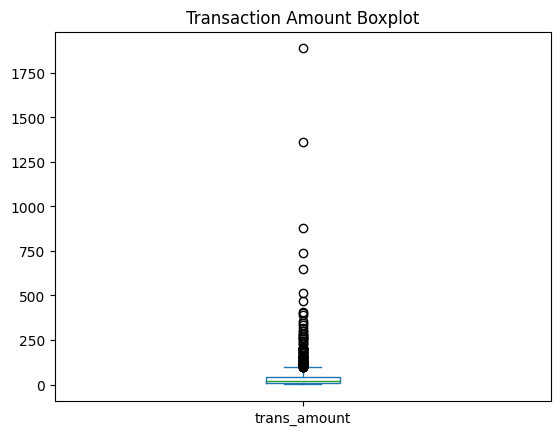

In [ ]:
# analyzing distribution in the transaction amount column

auth_data['trans_amount'].plot(kind='box')
plt.title('Transaction Amount Boxplot')

The median amount is closer to the the lower end of the interquartile range indicating that majority of the transactions in this datatset have low values. Several extreme ouliers are  observed here which are much above the majority of the data. These could be legitimate high-value transactons or potential fraud cases. Needs further investigation.

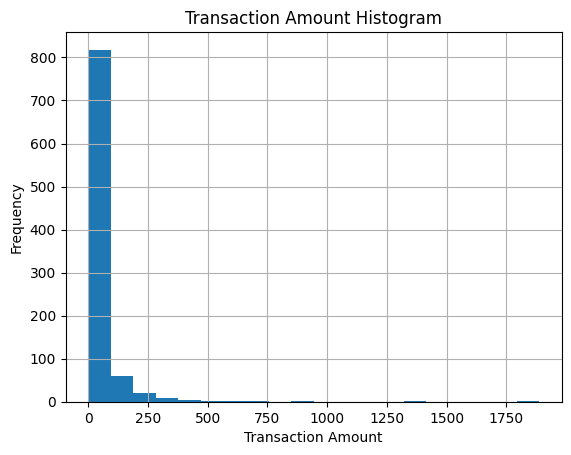

In [ ]:
# analyzing the spread of transaction amount using histogram

auth_data['trans_amount'].hist(bins=20)
plt.title('Transaction Amount Histogram')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

The histogram shows that the data is highly skewed to the right. High value transactions are sparse.

In [ ]:
# find common columns in all three datasets for merging
common_cols = auth_data.columns.intersection(fraud_data.columns).intersection(dispute_data.columns)
print("Common columns in three datasets:", common_cols)

# find common columns in auth and fraud datasets
common_cols = auth_data.columns.intersection(fraud_data.columns)
print("Common columns in auth and fraud datasets:", common_cols)

# find common columns in auth and dispute datasets
common_cols = auth_data.columns.intersection(dispute_data.columns)
print("Common columns in auth and dispute datasets:", common_cols)

# find common columns in fraud and dispute datasets
common_cols = fraud_data.columns.intersection(dispute_data.columns)
print("Common columns in fraud and dispute datasets:", common_cols)

Common columns in three datasets: Index(['acct_number', 'merchant_name', 'merchant_id'], dtype='object')
Common columns in auth and fraud datasets: Index(['acct_number', 'trans_date', 'merchant_name', 'merchant_id'], dtype='object')
Common columns in auth and dispute datasets: Index(['acct_number', 'trans_id', 'trans_amount', 'merchant_name',
       'merchant_id'],
      dtype='object')
Common columns in fraud and dispute datasets: Index(['acct_number', 'merchant_name', 'merchant_id'], dtype='object')


# **Q1.	Track and analyze trends in key performance metrics**


Q1. Track and analyze trends in key performance metrics (sale, fraud, fraud rate and approval rates) on a month-over-month basis.

In [ ]:
# merge the auth_data and dispute_data datsets
auth_dispute_merged = pd.merge(auth_data, dispute_data, on = ['trans_id'], how='left')

# Get Year+Month from the transaction date
auth_dispute_merged['year_month'] = auth_dispute_merged['trans_date'].dt.to_period('M')

# Create flags to identify a transaction as approved or declined or account verification using trans_description2
auth_dispute_merged = pd.get_dummies(auth_dispute_merged, columns=['trans_description2'], prefix='', prefix_sep='')

# rename the  approved or declined
auth_dispute_merged.rename(columns={'APPROVE': 'approved', 'DECLINE': 'declined'}, inplace=True)

# Create flag for fraud transactions
auth_dispute_merged['fraud_flag'] = auth_dispute_merged['category'].eq('Fraud').astype(int)

In [ ]:
# Calculate total_approved_amount, total_declined_amount, and total_fraud_amount
auth_dispute_merged['approved_amount'] = auth_dispute_merged.apply(
    lambda row: row['trans_amount_x'] if row['approved'] == 1 else 0, axis=1
)
auth_dispute_merged['declined_amount'] = auth_dispute_merged.apply(
    lambda row: row['trans_amount_x'] if row['declined'] == 1 else 0, axis=1
)
auth_dispute_merged['fraud_amount'] = auth_dispute_merged.apply(
    lambda row: row['trans_amount_x'] if row['fraud_flag'] == 1 else 0, axis=1
)

# Group by year_month and aggregate metrics
monthly_metrics = auth_dispute_merged.groupby('year_month').agg(
    total_transactions=('trans_id', 'count'),
    total_sales=('trans_amount_x', 'sum'),
    total_approved_transactions=('approved', 'sum'),
    total_approved_amount=('approved_amount', 'sum'),
    total_declined_transactions=('declined', 'sum'),
    total_declined_amount=('declined_amount', 'sum'),
    total_fraud_transactions=('fraud_flag', 'sum'),
    total_fraud_amount=('fraud_amount', 'sum')
)

# Reset index
monthly_metrics.reset_index(inplace=True)

In [ ]:
# calculate fraud_rate and approval_rate

monthly_metrics['fraud_rate'] = round(monthly_metrics['total_fraud_transactions'] / monthly_metrics['total_transactions'] * 100,2)
monthly_metrics['approval_rate'] = round(monthly_metrics['total_approved_transactions'] / monthly_metrics['total_transactions'] * 100,2)
monthly_metrics['fraud_loss_rate'] = round(monthly_metrics['total_fraud_amount']/monthly_metrics['total_sales'] * 100,2)

In [ ]:
monthly_metrics

,year_month,total_transactions,total_sales,total_approved_transactions,total_approved_amount,total_declined_transactions,total_declined_amount,total_fraud_transactions,total_fraud_amount,fraud_rate,approval_rate,fraud_loss_rate
0,2023-10,293,12362.27,252,8429.40,41,3932.87,25,692.86,8.53,86.01,5.60
1,2023-11,291,16722.92,242,14380.21,49,2342.71,27,1714.71,9.28,83.16,10.25
2,2023-12,331,13019.82,271,10919.79,60,2100.03,15,1006.77,4.53,81.87,7.73


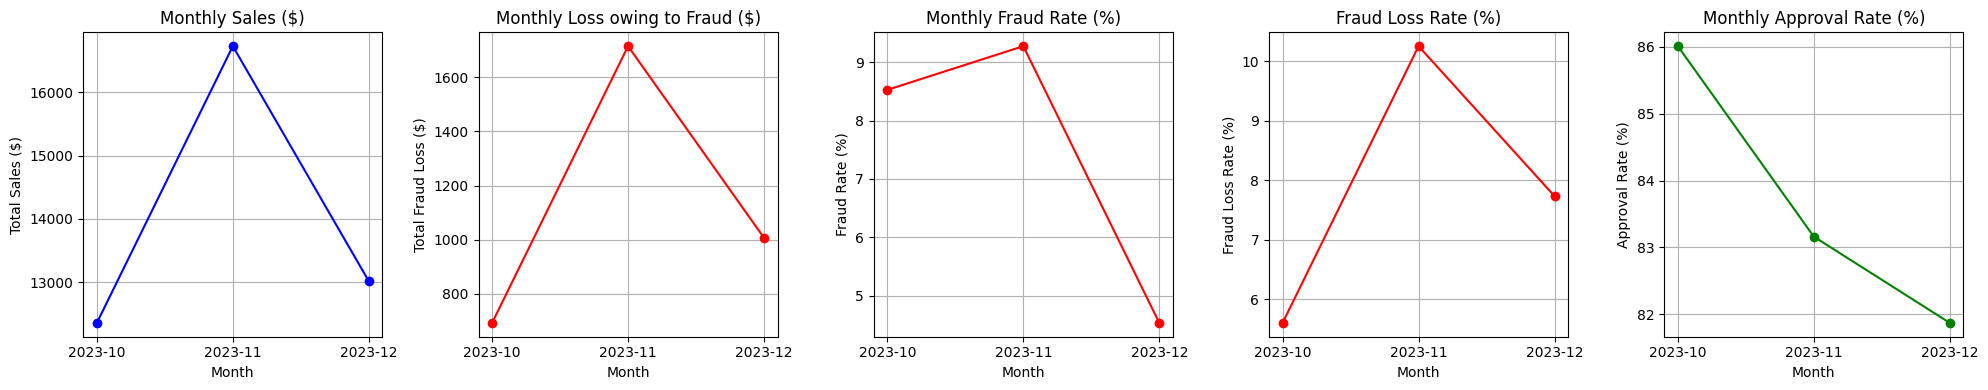

In [ ]:
# plot the metrics

fig, axes = plt.subplots(1, 5, figsize=(20, 4))
axes = axes.flatten()

# Plot Total Sales
axes[0].plot(monthly_metrics['year_month'].astype(str), monthly_metrics['total_sales'],
             marker='o', linestyle='-', color='b', label='Total Sales')
axes[0].set_title('Monthly Sales ($)')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Total Sales ($)')
axes[0].grid()

# Plot Total Fraud Loss
axes[1].plot(monthly_metrics['year_month'].astype(str), monthly_metrics['total_fraud_amount'],
             marker='o', linestyle='-', color='r', label='Total Fraud Loss ($)')
axes[1].set_title('Monthly Loss owing to Fraud ($)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Total Fraud Loss ($)')
axes[1].grid()

# Plot Fraud Rate
axes[2].plot(monthly_metrics['year_month'].astype(str), monthly_metrics['fraud_rate'],
             marker='o', linestyle='-', color='r', label='Fraud Rate')
axes[2].set_title('Monthly Fraud Rate (%)')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Fraud Rate (%)')
axes[2].grid()

# Plot Fraud Loss Rate
axes[3].plot(monthly_metrics['year_month'].astype(str), monthly_metrics['fraud_loss_rate'],
             marker='o', linestyle='-', color='r', label='Fraud Loss Rate')
axes[3].set_title('Fraud Loss Rate (%)')
axes[3].set_xlabel('Month')
axes[3].set_ylabel('Fraud Loss Rate (%)')
axes[3].grid()

# Plot Approval Rate
axes[4].plot(monthly_metrics['year_month'].astype(str), monthly_metrics['approval_rate'],
             marker='o', linestyle='-', color='g', label='Approval Rate')
axes[4].set_title('Monthly Approval Rate (%)')
axes[4].set_xlabel('Month')
axes[4].set_ylabel('Approval Rate (%)')
axes[4].grid()

# Hide any unused subplot (if fewer than 6 plots)
if len(axes) > 5:
    axes[5].axis('off')

plt.tight_layout()
plt.show()

**Monthly Sales ($):**

The total sales increased significantly in November 2023, peaking at over USD 16000, returning to levels similar to October 2023 (around USD 13,000).
This suggests a possible seasonal effect or promotion in November.

**Monthly Loss Owing to Fraud ($):**

Fraud-related losses follow a similar pattern to sales, with a sharp increase in November 2023, exceeding USD 1,600. Losses decreased significantly in December 2023, similar to October 2023 levels (below USD 800).
This correlation indicates that higher sales may have led to higher fraud-related losses.

**Monthly Fraud Rate (%):**

The fraud rate (percentage of fraudulent transactions relative to total transactions) increased in November 2023, reaching over 9%, before dropping in December to below 6%.
The increase in November could be linked to higher sales activity, which might have provided more opportunities for fraudulent transactions.

**Fraud Loss Rate (%):**

The fraud loss rate (percentage of sales lost due to fraud) peaked in November 2023 at over 10%, mirroring the trends in fraud losses and fraud rate.
This indicates that not only was fraud more prevalent in November, but the financial impact was also disproportionately higher.

**Monthly Approval Rate (%):**

The approval rate (percentage of transactions approved) shows a consistent decline from 86% in October 2023 to around 82% in December 2023.
This may indicate stricter approval criteria, perhaps in response to the higher fraud rates observed in November, or a general decrease in legitimate transaction volumes.

In [ ]:
# Calculate MoM percentage change for each metric

monthly_metrics['sales_mom_change'] = round(monthly_metrics['total_sales'].pct_change() * 100,2)
monthly_metrics['fraud_rate_mom_change'] = round(monthly_metrics['fraud_rate'].pct_change() * 100,2)
monthly_metrics['fraud_amount_mom_change'] = round(monthly_metrics['total_fraud_amount'].pct_change() * 100,2)
monthly_metrics['approval_rate_mom_change'] = round(monthly_metrics['approval_rate'].pct_change() * 100,2)
monthly_metrics['fraud_loss_rate_mom_change'] = round(monthly_metrics['fraud_loss_rate'].pct_change() * 100,2)

monthly_metrics.fillna(0, inplace=True)
monthly_metrics

,year_month,total_transactions,total_sales,total_approved_transactions,total_approved_amount,total_declined_transactions,total_declined_amount,total_fraud_transactions,total_fraud_amount,fraud_rate,approval_rate,fraud_loss_rate,sales_mom_change,fraud_rate_mom_change,fraud_amount_mom_change,approval_rate_mom_change,fraud_loss_rate_mom_change
0,2023-10,293,12362.27,252,8429.40,41,3932.87,25,692.86,8.53,86.01,5.60,0.00,0.00,0.00,0.00,0.00
1,2023-11,291,16722.92,242,14380.21,49,2342.71,27,1714.71,9.28,83.16,10.25,35.27,8.79,147.48,-3.31,83.04
2,2023-12,331,13019.82,271,10919.79,60,2100.03,15,1006.77,4.53,81.87,7.73,-22.14,-51.19,-41.29,-1.55,-24.59


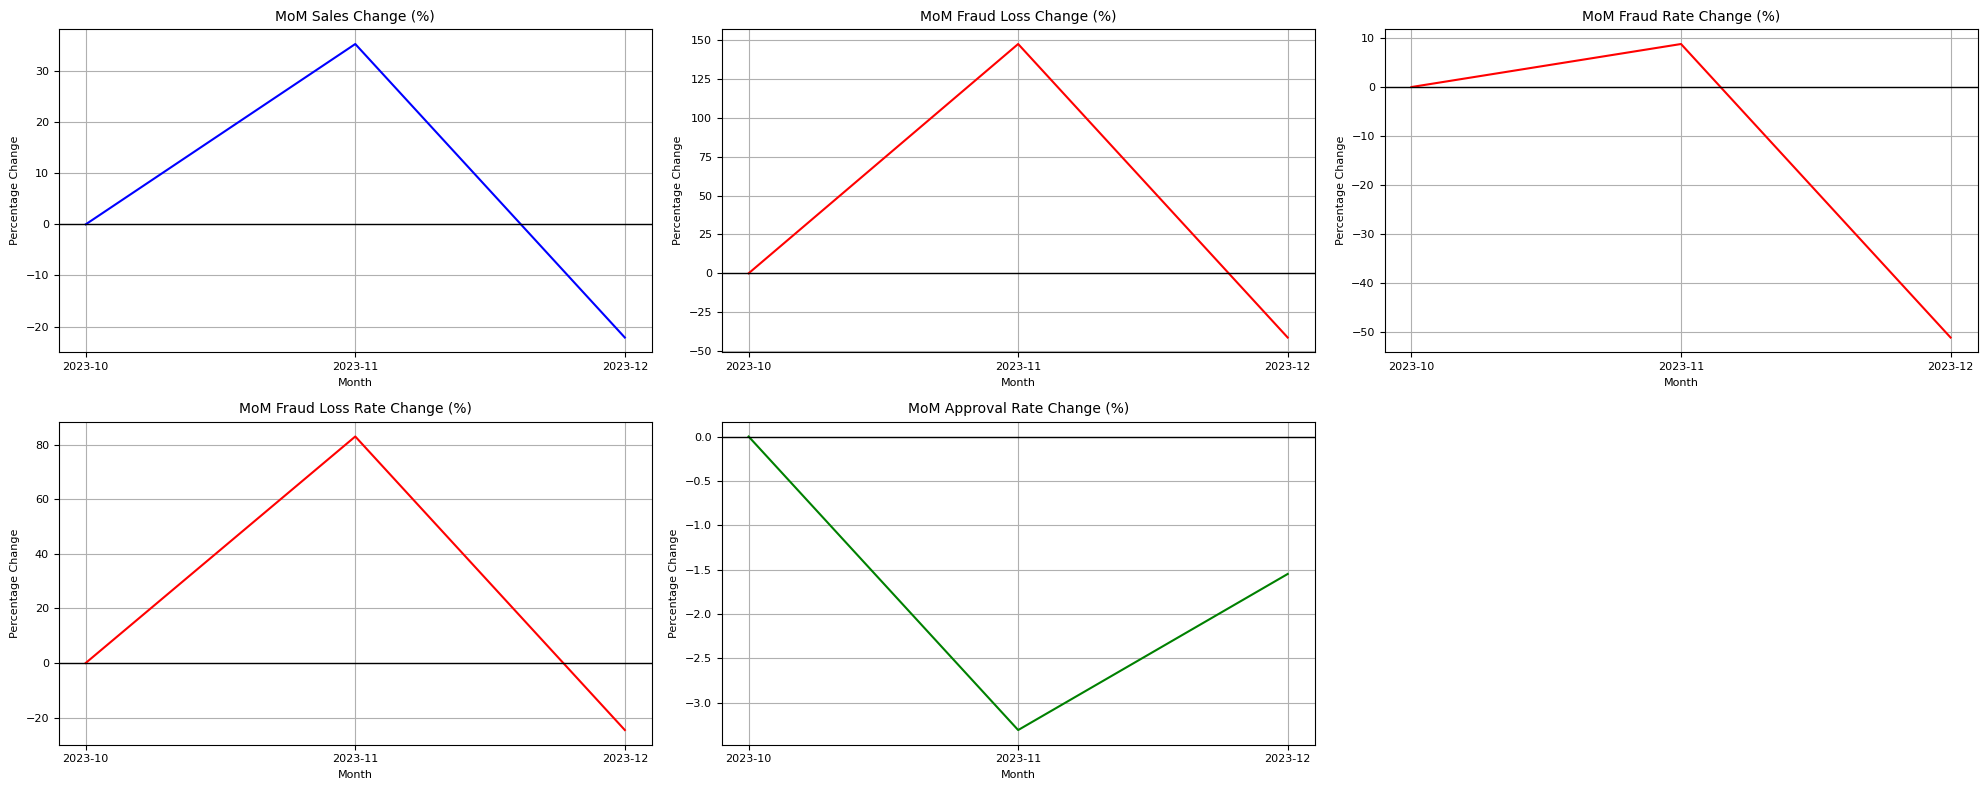

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 8))  # Adjusted figsize for better layout
axes = axes.ravel()  # Flatten the 2D array of axes for easier indexing

# Plot Month-Over-Month Sales Change (%)
axes[0].plot(monthly_metrics['year_month'].astype(str), monthly_metrics['sales_mom_change'], color = 'b')
axes[0].set_title('MoM Sales Change (%)', fontsize=10)
axes[0].set_xlabel('Month', fontsize=8)
axes[0].set_ylabel('Percentage Change', fontsize=8)
axes[0].tick_params(axis='both', labelsize=8)
axes[0].axhline(0, color='black', linestyle='-', linewidth=1)
axes[0].grid()

# Plot Month-Over-Month Fraud Loss Amount Change (%)
axes[1].plot(monthly_metrics['year_month'].astype(str), monthly_metrics['fraud_amount_mom_change'], color = 'r')
axes[1].set_title('MoM Fraud Loss Change (%)', fontsize=10)
axes[1].set_xlabel('Month', fontsize=8)
axes[1].set_ylabel('Percentage Change', fontsize=8)
axes[1].tick_params(axis='both', labelsize=8)
axes[1].axhline(0, color='black', linestyle='-', linewidth=1)
axes[1].grid()

# Plot Month-Over-Month Fraud Rate Change (%)
axes[2].plot(monthly_metrics['year_month'].astype(str), monthly_metrics['fraud_rate_mom_change'], color = 'r')
axes[2].set_title('MoM Fraud Rate Change (%)', fontsize=10)
axes[2].set_xlabel('Month', fontsize=8)
axes[2].set_ylabel('Percentage Change', fontsize=8)
axes[2].tick_params(axis='both', labelsize=8)
axes[2].axhline(0, color='black', linestyle='-', linewidth=1)
axes[2].grid()

# Plot Month-Over-Month Fraud Loss Rate Change (%)
axes[3].plot(monthly_metrics['year_month'].astype(str), monthly_metrics['fraud_loss_rate_mom_change'], color = 'r')
axes[3].set_title('MoM Fraud Loss Rate Change (%)', fontsize=10)
axes[3].set_xlabel('Month', fontsize=8)
axes[3].set_ylabel('Percentage Change', fontsize=8)
axes[3].tick_params(axis='both', labelsize=8)
axes[3].axhline(0, color='black', linestyle='-', linewidth=1)
axes[3].grid()

# Plot Month-Over-Month Approval Rate Change (%)
axes[4].plot(monthly_metrics['year_month'].astype(str), monthly_metrics['approval_rate_mom_change'], color = 'g')
axes[4].set_title('MoM Approval Rate Change (%)', fontsize=10)
axes[4].set_xlabel('Month', fontsize=8)
axes[4].set_ylabel('Percentage Change', fontsize=8)
axes[4].tick_params(axis='both', labelsize=8)
axes[4].axhline(0, color='black', linestyle='-', linewidth=1)
axes[4].grid()

# Remove the empty subplot
fig.delaxes(axes[5])  # Remove the last unused subplot

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**MoM Sales Change (%):**

There is a sharp increase in sales from October to November. Sales experienced a significant drop from November to December. This indicates a potential seasonal or promotional spike in November, followed by a steep decline in December.

**MoM Fraud Loss Change (%):**

A massive increase in fraud losses is observed from October to November. Fraud losses declined sharply, with MoM change dropping below -50% November to December.
This highlights a potential increase in fraudulent activities during the high-sales period in November, followed by effective fraud prevention or reduced activity in December.

**MoM Fraud Rate Change (%):**

The fraud rate increased, but the change is less pronounced compared to fraud losses from October to November.
A steep decline is observed from November to December.
This indicates that the relative frequency of fraudulent transactions decreased significantly in December.

**MoM Fraud Loss Rate Change (%):**

A sharp increase in the fraud loss rate, with MoM change nearing 80% from October to November. A sharp decline is observed from November to December.
This trend aligns with the fraud loss and fraud rate changes, indicating heightened risk during November, likely due to increased sales activity.

**MoM Approval Rate Change (%):**

A decline in the approval rate is observed from October to November. A slight recovery in approval rates is observed from November to December.
This suggests stricter transaction approvals in November, potentially due to heightened fraud risks, followed by a normalization in December.

**Overall insight:**

November 2023 experienced both increased sales and a slight rise in fraud rates. This aligns with high transaction volumes during peak activity periods.
December 2023 saw a decline in sales but a dramatic reduction in fraud rates, coupled with a recovery in approval rates. This may indicate improved control mechanisms during November 2023.

Additional Insights that can be extracted with further analysis:
- Day wise trends for all these key metrics
- Merchant wise fraud rate
- Accounts level key metrics

# **Q2.	Showcase hourly trends**

Q2. What is the best hour and worst hour in a day. How would you define the best and worst hour?

In [ ]:
# get the hour from date_time
auth_dispute_merged['trans_time'] = pd.to_datetime(auth_dispute_merged['trans_time'], format='%H:%M:%S')

# Extract the hour
auth_dispute_merged['trans_hour'] = auth_dispute_merged['trans_time'].dt.hour

# calculate approved, declined, and fraud amounts
auth_dispute_merged['approved_amount'] = auth_dispute_merged.apply(
    lambda row: row['trans_amount_x'] if row['approved'] == 1 else 0, axis=1
)
auth_dispute_merged['declined_amount'] = auth_dispute_merged.apply(
    lambda row: row['trans_amount_x'] if row['declined'] == 1 else 0, axis=1
)
auth_dispute_merged['fraud_amount'] = auth_dispute_merged.apply(
    lambda row: row['trans_amount_x'] if row['fraud_flag'] == 1 else 0, axis=1
)

# Group by transaction hour and aggregate metrics
hourly_metrics = auth_dispute_merged.groupby('trans_hour').agg(
    total_transactions=('trans_id', 'count'),
    total_sales=('trans_amount_x', 'sum'),
    total_approved_transactions=('approved', 'sum'),
    total_approved_amount=('approved_amount', 'sum'),
    total_declined_transactions=('declined', 'sum'),
    total_declined_amount=('declined_amount', 'sum'),
    total_fraud_transactions=('fraud_flag', 'sum'),
    total_fraud_amount=('fraud_amount', 'sum')
)
hourly_metrics.reset_index(inplace=True)

# calculate fraud_rate and approval_rate

hourly_metrics['fraud_rate'] = round(hourly_metrics['total_fraud_transactions'] / hourly_metrics['total_transactions'] * 100,2)
hourly_metrics['approval_rate'] = round(hourly_metrics['total_approved_transactions'] / hourly_metrics['total_transactions'] * 100,2)
hourly_metrics

,trans_hour,total_transactions,total_sales,total_approved_transactions,total_approved_amount,total_declined_transactions,total_declined_amount,total_fraud_transactions,total_fraud_amount,fraud_rate,approval_rate
0,0,16,852.66,9,303.39,7,549.27,1,55.76,6.25,56.25
1,1,14,1385.51,8,1185.57,6,199.94,0,0.00,0.00,57.14
2,2,9,394.46,7,344.45,2,50.01,1,39.95,11.11,77.78
3,3,16,345.99,11,177.26,5,168.73,1,9.98,6.25,68.75
4,4,22,771.58,17,562.88,5,208.70,1,10.00,4.55,77.27
5,5,38,1292.62,29,1054.56,9,238.06,3,198.21,7.89,76.32
6,6,29,1213.23,21,409.07,8,804.16,1,28.94,3.45,72.41
7,7,44,1527.93,34,1062.68,10,465.25,4,216.71,9.09,77.27
8,8,38,1708.57,30,1555.79,8,152.78,3,87.69,7.89,78.95
9,9,49,1652.65,41,1186.14,8,466.51,1,97.57,2.04,83.67


## **Best and Worst Hour**

### **Hourly Trends based on Sales and Losses**

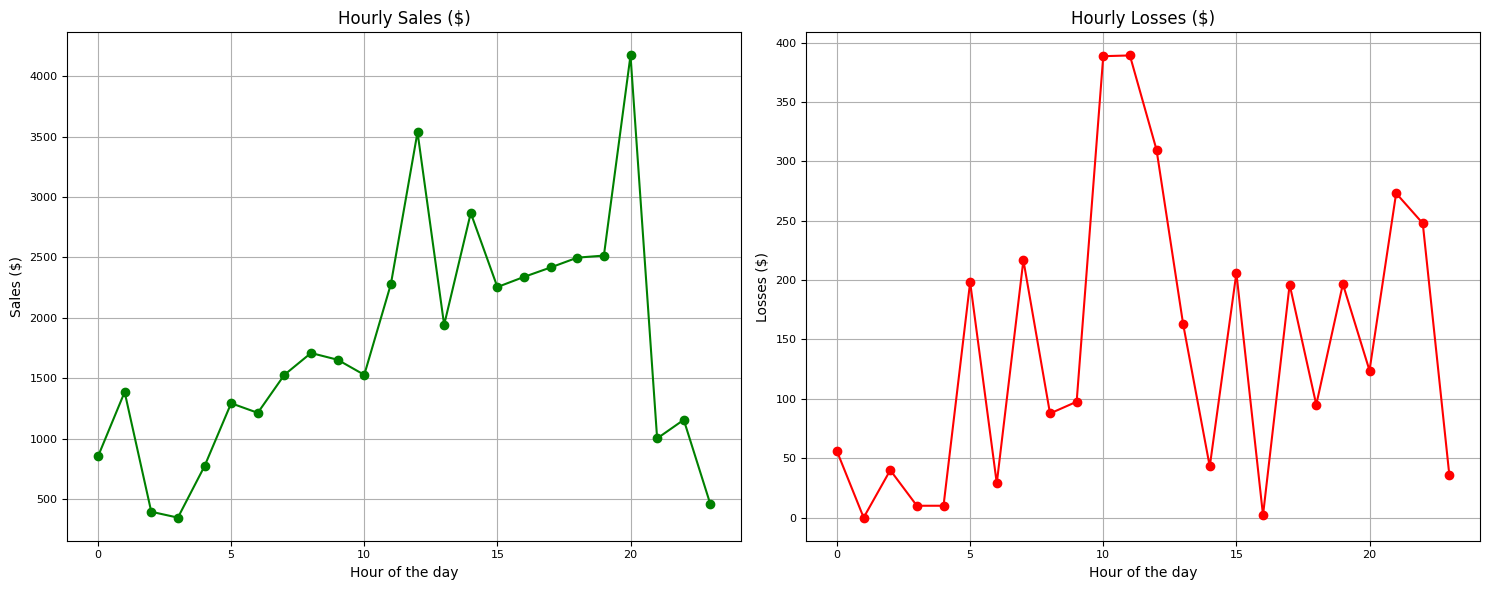

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # Adjust the figure size for side-by-side plots

# Plot Hourly Sales
axes[0].plot(hourly_metrics['trans_hour'], hourly_metrics['total_sales'],
             marker='o', linestyle='-', color='g', label='Sales')
axes[0].set_title('Hourly Sales ($)', fontsize=12)
axes[0].set_xlabel('Hour of the day', fontsize=10)
axes[0].set_ylabel('Sales ($)', fontsize=10)
axes[0].tick_params(axis='both', labelsize=8)
axes[0].grid()

# Plot Hourly Losses
axes[1].plot(hourly_metrics['trans_hour'], hourly_metrics['total_fraud_amount'],
             marker='o', linestyle='-', color='r', label='Loss')
axes[1].set_title('Hourly Losses ($)', fontsize=12)
axes[1].set_xlabel('Hour of the day', fontsize=10)
axes[1].set_ylabel('Losses ($)', fontsize=10)
axes[1].tick_params(axis='both', labelsize=8)
axes[1].grid()

# Adjust layout
plt.tight_layout()
plt.show()

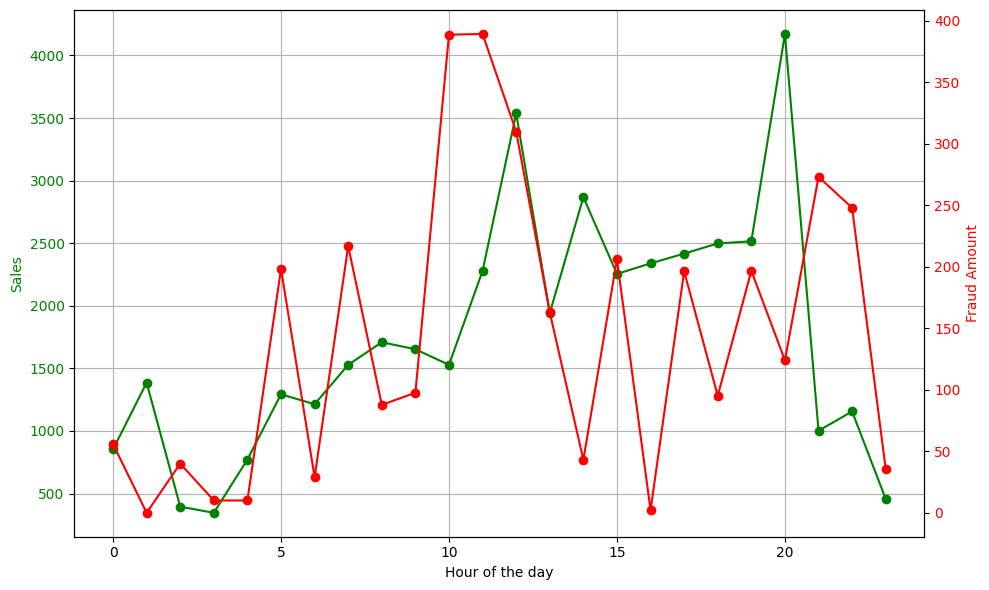

In [ ]:
# Compare hourly sales and losses

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(hourly_metrics['trans_hour'], hourly_metrics['total_sales'],
         marker='o', linestyle='-', color='g', label='Sales')
ax1.set_xlabel('Hour of the day')
ax1.set_ylabel('Sales', color='g')
ax1.tick_params(axis='y', labelcolor='g')
#ax1.set_title('Hourly Transaction Frequency and Fraud Rates')
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(hourly_metrics['trans_hour'], hourly_metrics['total_fraud_amount'],
         marker='o', linestyle='-', color='r', label='Fraud Amount (Losses)')
ax2.set_ylabel('Fraud Amount', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Show the plot
fig.tight_layout()
plt.show()

**Best Hour: 14:00 (2 PM)**

Sales are relatively high at this time.
Fraud is significantly lower compared to both earlier (10:00) and later (20:00) hours.
This combination of high sales and low fraud suggests that the business operates efficiently during this hour. The balance between high revenue generation and minimal losses makes 14:00 the most productive and secure hour for the business.

**Worst Hour: 10:00 (10 AM)**

Sales are lower than the peak hours of 14:00 or 20:00.
Fraud amount spikes significantly during this time, representing a high percentage of sales lost to fraud.
This combination of moderate sales and high fraud makes this hour the least favorable for the business.
The business experiences heightened risk during this hour, suggesting that stricter fraud controls or monitoring are needed.

**Definition of Best and Worst Hours:**

**Best Hour:**

The hour where sales are high and fraud is low, maximizing revenue while minimizing losses. Example: 14:00 (2 PM).

**Worst Hour:**

The hour where sales are moderate or low and fraud is high, resulting in a higher proportion of losses relative to revenue. Example: 10:00 (10 AM).

### **Hourly Trends based on Transaction Frequency and Fraud rates and Approval rates**



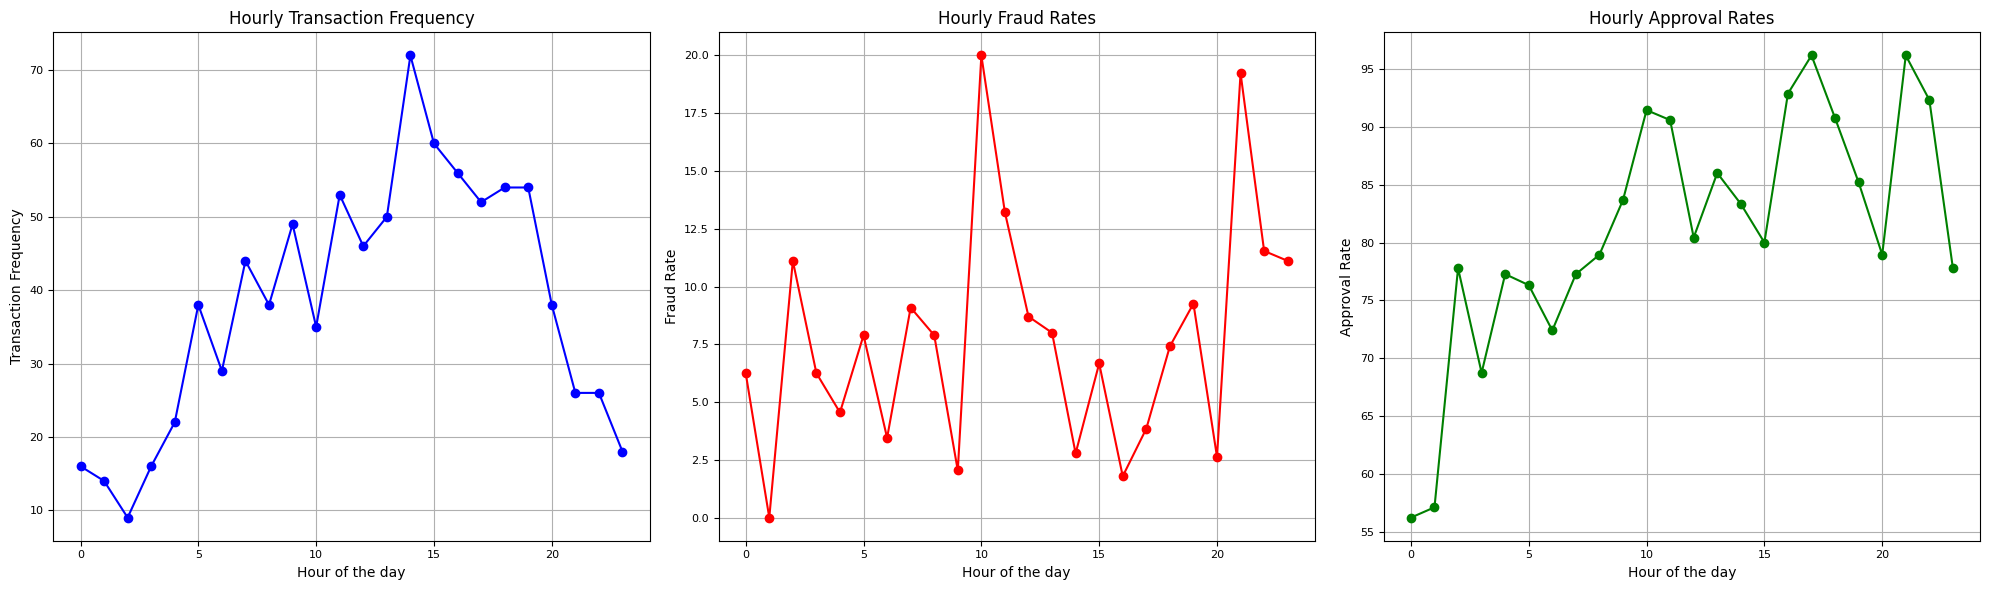

In [ ]:
# Create a 1x3 grid for subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # Adjust the figure size for three side-by-side plots

# Plot Hourly Transaction Frequency
axes[0].plot(hourly_metrics['trans_hour'], hourly_metrics['total_transactions'],
             marker='o', linestyle='-', color='b', label='Transaction Frequency')
axes[0].set_title('Hourly Transaction Frequency', fontsize=12)
axes[0].set_xlabel('Hour of the day', fontsize=10)
axes[0].set_ylabel('Transaction Frequency', fontsize=10)
axes[0].tick_params(axis='both', labelsize=8)
axes[0].grid()

# Plot Hourly Fraud Rates
axes[1].plot(hourly_metrics['trans_hour'], hourly_metrics['fraud_rate'],
             marker='o', linestyle='-', color='r', label='Fraud Rate')
axes[1].set_title('Hourly Fraud Rates', fontsize=12)
axes[1].set_xlabel('Hour of the day', fontsize=10)
axes[1].set_ylabel('Fraud Rate', fontsize=10)
axes[1].tick_params(axis='both', labelsize=8)
axes[1].grid()

# Plot Hourly Approval Rates
axes[2].plot(hourly_metrics['trans_hour'], hourly_metrics['approval_rate'],
             marker='o', linestyle='-', color='g', label='Approval Rate')
axes[2].set_title('Hourly Approval Rates', fontsize=12)
axes[2].set_xlabel('Hour of the day', fontsize=10)
axes[2].set_ylabel('Approval Rate', fontsize=10)
axes[2].tick_params(axis='both', labelsize=8)
axes[2].grid()

# Adjust layout to ensure proper spacing
plt.tight_layout()
plt.show()


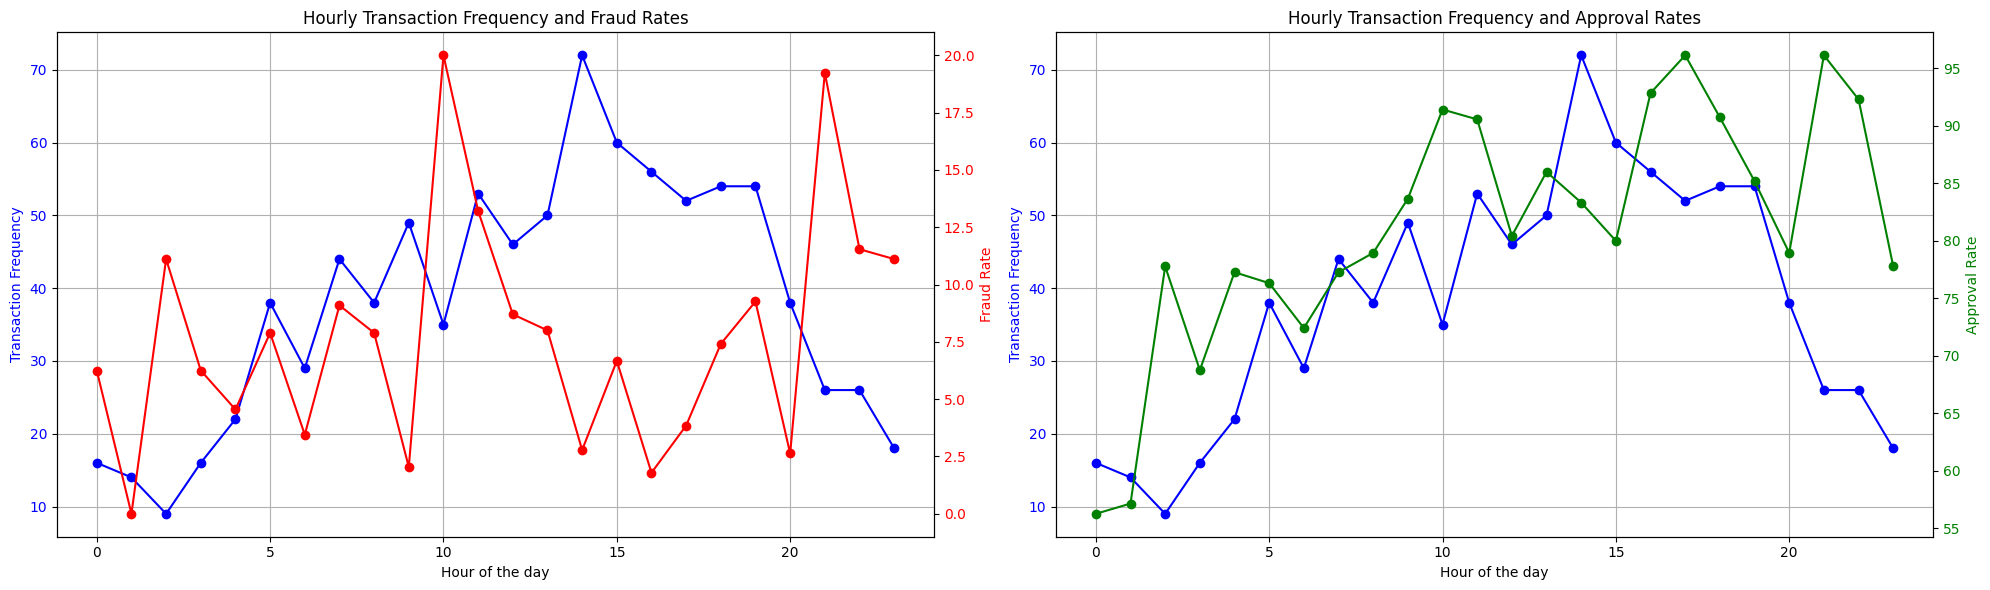

In [ ]:
# Create a 1x2 grid for subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Adjust the figure size for two side-by-side plots

# Chart 1: Compare Fraud Rates with Transaction Frequency
ax1 = axes[0]
ax1.plot(hourly_metrics['trans_hour'], hourly_metrics['total_transactions'],
         marker='o', linestyle='-', color='b', label='Transaction Frequency')
ax1.set_xlabel('Hour of the day')
ax1.set_ylabel('Transaction Frequency', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_title('Hourly Transaction Frequency and Fraud Rates')
ax1.grid()

# Second y-axis for Fraud Rate
ax2 = ax1.twinx()
ax2.plot(hourly_metrics['trans_hour'], hourly_metrics['fraud_rate'],
         marker='o', linestyle='-', color='r', label='Fraud Rate')
ax2.set_ylabel('Fraud Rate', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Chart 2: Compare Approval Rates with Transaction Frequency
ax3 = axes[1]
ax3.plot(hourly_metrics['trans_hour'], hourly_metrics['total_transactions'],
         marker='o', linestyle='-', color='b', label='Transaction Frequency')
ax3.set_xlabel('Hour of the day')
ax3.set_ylabel('Transaction Frequency', color='b')
ax3.tick_params(axis='y', labelcolor='b')
ax3.set_title('Hourly Transaction Frequency and Approval Rates')
ax3.grid()

# Second y-axis for Approval Rate
ax4 = ax3.twinx()
ax4.plot(hourly_metrics['trans_hour'], hourly_metrics['approval_rate'],
         marker='o', linestyle='-', color='g', label='Approval Rate')
ax4.set_ylabel('Approval Rate', color='g')
ax4.tick_params(axis='y', labelcolor='g')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


**Best Hour: 14:00 (2 PM)**

Approval rate peaks (~95%) during this hour, indicating efficient transaction processing. Fraud remains relatively low compared to other high-transaction hours like 10:00 or 20:00. Although not the highest, the transaction frequency is still significant, ensuring solid revenue generation.

**Worst Hour: 10:00 (10 AM)**

Fraud rate peaks at 20%, indicating a substantial risk. Approval rate is around 85%, lower than during better hours like 14:00.
The Transaction Frequency is High, which amplifies the impact of fraud, as a larger number of transactions are at risk. Despite high transaction activity, the high fraud rate and moderate approval efficiency make this hour the least favorable.

**Definition of Best and Worst Hours:**

**Best Hour:**

The hour which has a High approval rate, Moderate-to-high transaction frequency and Low fraud rate.

**Worst Hour:**

The hour which has a High fraud rate, Moderate-to-high transaction frequency and
Moderate or low approval rate.

Additional Insights:

- Same trends on a every monthly basis x-axis - hous and y-3 lines each representing month





# **Q3a. Loss prevention strategies and rule performance**



3a. Create strategies that prevent loss and evaluate the performance of the rules created.

creating dataset for analysis

In [ ]:
# rename column merchant_id_x' to 'merchant_id

auth_dispute_merged.rename(columns={'merchant_id_x': 'merchant_id', 'acct_number_x' : 'acct_number'}, inplace=True)

# merge the auth_dispute_merged dataset with fraud_data

data = auth_dispute_merged.merge(fraud_data, on=['acct_number', 'merchant_id'], how='left')

In [ ]:
# drop unnecessary columns
data = data.drop(['acct_number_y',	'trans_amount_y', 'merchant_id_y', 'merchant_name_x', 'merchant_name_y', 'trans_amount_y', 'transaction_amount', 'trans_hour_y'], axis = 1)

# rename columns
data.rename(columns={'trans_date_x': 'trans_date', 'trans_amount_x' : 'trans_amount'}, inplace=True)

## Rule 1:Transaction frequency in the last 24 hours exceeds a threshold.

Identify days with unusually high transaction volumes that deviate significantly from the norm. This can help flag potential fraudulent activity where transactions spike unexpectedly.

In [ ]:
data['trans_date'] = pd.to_datetime(data['trans_date'], errors='coerce')

# Get the daily transaction counts
daily_transaction_counts = data.groupby(data['trans_date'].dt.date).size()

# capture mean, standard deviation and thereshold
mean_transactions = daily_transaction_counts.mean()
std_transactions = daily_transaction_counts.std() # capture typical variability

In [ ]:
# create thresholds
thresholds = {"0_std": mean_transactions + 0 * std_transactions, "1_std": mean_transactions + 1 * std_transactions, "1.5_std": mean_transactions + 1.5 * std_transactions, "2_std": mean_transactions + 2 * std_transactions, "3_std": mean_transactions + 3 * std_transactions}

# Evaluate the rule for each threshold

results = []
for key, thresh in thresholds.items():

    # Identify anomalous days
    anomalies = daily_transaction_counts[daily_transaction_counts > thresh]
    data['rule1_flag'] = data['trans_date'].dt.date.isin(anomalies.index)

    # Calculate metrics
    true_positives = data[(data['rule1_flag'] == True) & (data['fraud_flag'] == 1)].shape[0] # anomalies flagged as fraud cases
    flagged_positives = data[data['rule1_flag'] == True].shape[0] # all anomalies
    false_positives = flagged_positives - true_positives # anomalies that were not flagged as fraud
    total_fraud_cases = data[data['fraud_flag'] == 1].shape[0]
    recall = true_positives / total_fraud_cases if total_fraud_cases > 0 else 0 # Percentage of total fraud cases identified by the rule
    precision = true_positives / flagged_positives if flagged_positives > 0 else 0 # Percentage of flagged anomalies that were actually fraudulent

    results.append({
        "Threshold": key,
        "Anomaly Threshold": thresh,
        "Precision": precision,
        "recall (%)": recall * 100,
        "True Positives": true_positives,
        "False Positives": false_positives,
        "Flagged Positives": flagged_positives,
        "Total Fraud Cases": total_fraud_cases
    })

results_df = pd.DataFrame(results)
results_df

,Threshold,Anomaly Threshold,Precision,recall (%),True Positives,False Positives,Flagged Positives,Total Fraud Cases
0,0_std,10.989130,0.079137,69.620253,55,640,695,79
1,1_std,14.887551,0.077441,29.113924,23,274,297,79
2,1.5_std,16.836761,0.072072,10.126582,8,103,111,79
3,2_std,18.785972,0.067797,5.063291,4,55,59,79
4,3_std,22.684392,0.000000,0.000000,0,0,0,79


**selecting 2_std as the threshold as it captures fraud cases with low false possitives**

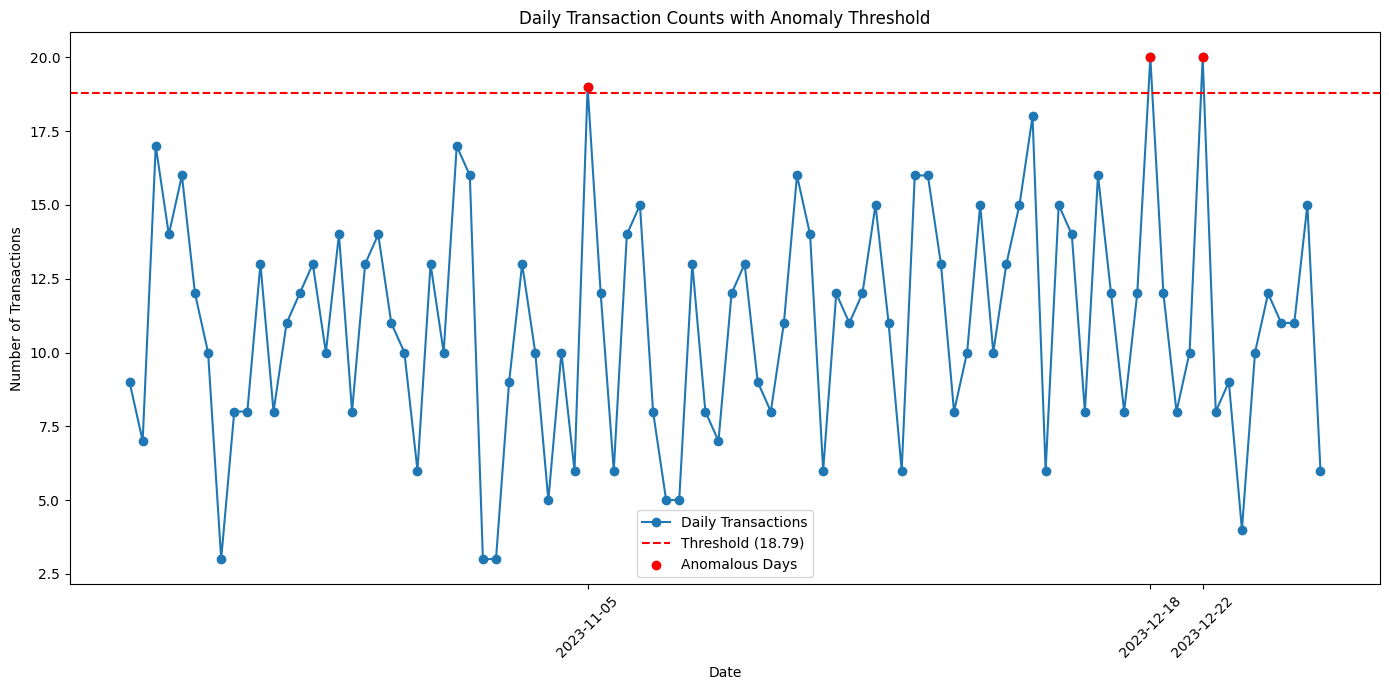

In [ ]:
threshold = mean_transactions + 2*std_transactions
anomalous_days = daily_transaction_counts[daily_transaction_counts > threshold]

daily_transaction_counts.index = pd.to_datetime(daily_transaction_counts.index)

# Plot daily transaction counts with anomaly threshold
plt.figure(figsize=(14, 7))
plt.plot(daily_transaction_counts.index, daily_transaction_counts.values, label='Daily Transactions', marker='o')
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold ({threshold:.2f})')
plt.scatter(anomalous_days.index, anomalous_days.values, color='red', label='Anomalous Days', zorder=5)
plt.title('Daily Transaction Counts with Anomaly Threshold')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.legend()
plt.xticks(ticks= anomalous_days.index, rotation=45)
plt.tight_layout()
plt.show()


**Rule 1: Flag a transaction as anomalous if the transaction frequency in the last 24 hours exceeds 2 standard deviations from the mean frequency.**

In [ ]:
# applying Rule 1 to the data

threshold1 = mean_transactions + 2 * std_transactions

# Identify anomalous days
anomalies = daily_transaction_counts[daily_transaction_counts > threshold1]
data['rule1_flag'] = data['trans_date'].dt.date.isin(anomalies.index)


## **Rule 2: Hourly Transaction frequency anomalies**

Identify accounts or merchants with an unusually high number of transactions within short time windows (e.g., 1 hour). Such bursts of activity are often indicative of fraudulent behavior, such as testing stolen cards or exploiting compromised accounts.

In [ ]:
# Convert transaction time to datetime
data['trans_datetime'] = pd.to_datetime(data['trans_time'], errors='coerce')

# Create hourly time windows
data['time_window'] = data['trans_datetime'].dt.floor('h')

# Group by account and time window to calculate transaction counts
transaction_counts = data.groupby(['acct_number', 'time_window']).size().reset_index(name='transaction_count')

# Applying the rule across multiple thresholds to test the best performing threshold

# Calculate overall mean and standard deviation of transaction counts
mean_count = transaction_counts['transaction_count'].mean()
std_count = transaction_counts['transaction_count'].std()

# Define multiple thresholds to test
thresholds = [1.5, 2, 3]  # Multipliers for standard deviation
results = []

for k in thresholds:
    threshold = mean_count + k * std_count

    # Flag anomalies
    transaction_counts['rule2_flag'] = transaction_counts['transaction_count'] > threshold

    # Merge anomaly flags back to the dataset
    merged_data = data.merge(transaction_counts[['acct_number', 'time_window', 'rule2_flag']],
                             on=['acct_number', 'time_window'], how='left')

    # Calculate metrics
    true_positives = merged_data[(merged_data['rule2_flag'] == True) & (merged_data['fraud_flag'] == 1)].shape[0]
    flagged_positives = merged_data[merged_data['rule2_flag'] == True].shape[0]
    total_fraud_cases = merged_data[merged_data['fraud_flag'] == 1].shape[0]
    false_positives = flagged_positives - true_positives
    precision = true_positives / flagged_positives if flagged_positives > 0 else 0
    recall = true_positives / total_fraud_cases if total_fraud_cases > 0 else 0

    # Store results
    results.append({
        "Threshold (k)": k,
        "Anomaly Threshold": threshold,
        "Precision": precision,
        "Recall (%)": recall * 100,
        "True Positives": true_positives,
        "False Positives": false_positives,
        "Flagged Positives": flagged_positives,
        "Total Fraud Cases": total_fraud_cases
    })

# Step 3: Display Results
results_df = pd.DataFrame(results)
results_df

,Threshold (k),Anomaly Threshold,Precision,Recall (%),True Positives,False Positives,Flagged Positives,Total Fraud Cases
0,1.5,1.932274,0.152709,39.240506,31,172,203,79
1,2.0,2.197714,0.057471,6.329114,5,82,87,79
2,3.0,2.728593,0.057471,6.329114,5,82,87,79


**Rule 2: Flag a transaction as anomalous if the hourly transaction frequency exceeds 1.5 standard deviations from the mean frequency.**

In [ ]:
# applying rule 2 to the data

threshold2 = mean_count + 1.5 * std_count

# Flag anomalies
transaction_counts['rule2_flag'] = transaction_counts['transaction_count'] > threshold
data = data.merge(transaction_counts[['acct_number', 'time_window', 'rule2_flag']],
                             on=['acct_number', 'time_window'], how='left')

## **Rule 3: High-value Transactions**

Identify transactions exceeding a high-value threshold, as these are often associated with fraud. Fraudsters tend to make large transactions to maximize their gain before detection. Here the threshold is the overall average transaction amount

In [ ]:
# average transaction amount
threshold = data['trans_amount'].mean()

data['rule3_flag'] = data['trans_amount'] > threshold

# Calculate metrics
true_positives = data[(data['rule3_flag'] == True) & (data['fraud_flag'] == 1)].shape[0]
flagged_positives = data[data['rule3_flag'] == True].shape[0]
total_fraud_cases = data[data['fraud_flag'] == 1].shape[0]
false_positives = flagged_positives - true_positives
precision = true_positives / flagged_positives if flagged_positives > 0 else 0
recall = true_positives / total_fraud_cases if total_fraud_cases > 0 else 0

results= {
"Anomaly Threshold": threshold,
"Precision": precision,
"Recall (%)": recall * 100,
"True Positives": true_positives,
"False Positives": false_positives,
"Flagged Positives": flagged_positives,
"Total Fraud Cases": total_fraud_cases
}

results_df = pd.DataFrame(results,index=[0])
results_df

,Anomaly Threshold,Precision,Recall (%),True Positives,False Positives,Flagged Positives,Total Fraud Cases
0,43.799565,0.129555,40.506329,32,215,247,79


**Rule 3: Flag a transaction as anomalous if the transaction amount exceeds the threshold of USD 43.79 (mean overall transaction amount)**

## **Rule 4: Geolocation Mismatch per merchant**

Flag merchants whose mismatch rate exceeds the threshold.


In [ ]:
# Add a flag for geolocation mismatch
data['geo_mismatch'] = data['merchant_state_code'] != data['cardholder_state_code']

# Compute Mismatch Rate per Merchant
# Calculate total transactions and mismatched transactions per merchant
merchant_geo_stats = data.groupby('merchant_id').agg(total_transactions=('geo_mismatch', 'size'),mismatched_transactions=('geo_mismatch', 'sum')).reset_index()

# Calculate mismatch rate
merchant_geo_stats['mismatch_rate'] = merchant_geo_stats['mismatched_transactions'] / merchant_geo_stats['total_transactions']

# Apply Multiple Thresholds
thresholds = [0.1, 0.2, 0.5, 0.7, 0.8, 0.9, 0.95]  # 10%, 20%, and 50% mismatch rates
results = []

for threshold in thresholds:
    # Flag merchants exceeding the threshold
    flagged_merchants = merchant_geo_stats[merchant_geo_stats['mismatch_rate'] > threshold]

    # Flag transactions associated with these merchants
    data['rule4_flag'] = data['merchant_id'].isin(flagged_merchants['merchant_id'])

    # Evaluate performance
    true_positives = data[(data['rule4_flag'] == True) & (data['fraud_flag'] == 1)].shape[0]
    flagged_positives = data[data['rule4_flag'] == True].shape[0]
    total_fraud_cases = data[data['fraud_flag'] == 1].shape[0]
    false_positives = flagged_positives - true_positives
    precision = true_positives / flagged_positives if flagged_positives > 0 else 0
    recall = true_positives / total_fraud_cases if total_fraud_cases > 0 else 0

    # Store results
    results.append({
        "Threshold": f"{int(threshold * 100)}%",
        "Precision": precision,
        "Recall (%)": recall * 100,
        "True Positives": true_positives,
        "False Positives": false_positives,
        "Flagged Positives": flagged_positives,
        "Total Fraud Cases": total_fraud_cases
    })

# Display Results
results_df = pd.DataFrame(results)
results_df

,Threshold,Precision,Recall (%),True Positives,False Positives,Flagged Positives,Total Fraud Cases
0,10%,0.096085,68.354430,54,508,562,79
1,20%,0.097473,68.354430,54,500,554,79
2,50%,0.100189,67.088608,53,476,529,79
3,70%,0.103792,65.822785,52,449,501,79
4,80%,0.101911,60.759494,48,423,471,79
5,90%,0.105023,58.227848,46,392,438,79
6,95%,0.108491,58.227848,46,378,424,79


**Rule 4: Flag a transaction as anomalous if the geolocation mismatch exceeds 70% for a merchant.**

In [ ]:
# apply this rule to the data

threshold = 0.7
flagged_merchants = merchant_geo_stats[merchant_geo_stats['mismatch_rate'] > threshold]
data['rule4_flag'] = data['merchant_id'].isin(flagged_merchants['merchant_id'])

## **Rule 5: High-value transactions at merchant level**

In [ ]:
# Ensure transaction amount column is numeric
data['trans_amount'] = pd.to_numeric(data['trans_amount'], errors='coerce').fillna(0)

# Calculate the global mean and standard deviation of transaction amounts
global_mean = data['trans_amount'].mean()
global_std = data['trans_amount'].std()

# Calculate total transaction amount for each merchant
merchant_totals = data.groupby('merchant_id')['trans_amount'].sum().reset_index()
merchant_totals.rename(columns={'trans_amount': 'total_transaction_amount'}, inplace=True)

# Test Multiple Global Thresholds
thresholds = [1.5, 2, 2.5, 3]  # List of threshold multipliers
results = []

for k in thresholds:
    # Calculate the global threshold
    threshold = global_mean + k * global_std

    # Flag merchants whose total transaction amount exceeds the global threshold
    merchant_totals['rule5_flag'] = merchant_totals['total_transaction_amount'] > threshold

    # Merge flags back to the main dataset
    data = data.drop(columns=['rule5_flag'], errors='ignore')  # Ensure no residual flags exist
    data = data.merge(merchant_totals[['merchant_id', 'rule5_flag']], on='merchant_id', how='left')

    # Step 3: Evaluate Rule Performance
    true_positives = data[(data['rule5_flag'] == True) & (data['fraud_flag'] == 1)].shape[0]
    flagged_positives = data[data['rule5_flag'] == True].shape[0]
    total_fraud_cases = data[data['fraud_flag'] == 1].shape[0]
    false_positives = flagged_positives - true_positives

    # Compute precision and recall
    precision = true_positives / flagged_positives if flagged_positives > 0 else 0
    recall = true_positives / total_fraud_cases if total_fraud_cases > 0 else 0

    # Store results
    results.append({
        "Threshold Multiplier (k)": k,
        "Global Threshold": threshold,
        "Precision": precision,
        "Recall (%)": recall * 100,
        "True Positives": true_positives,
        "False Positives": false_positives,
        "Flagged Positives": flagged_positives,
        "Total Fraud Cases": total_fraud_cases
    })

results_df = pd.DataFrame(results)
results_df

,Threshold Multiplier (k),Global Threshold,Precision,Recall (%),True Positives,False Positives,Flagged Positives,Total Fraud Cases
0,1.5,193.321378,0.089005,21.518987,17,174,191,79
1,2.0,243.161982,0.089888,20.253165,16,162,178,79
2,2.5,293.002586,0.085714,15.189873,12,128,140,79
3,3.0,342.843190,0.068182,7.594937,6,82,88,79


**Rule 5: Flag a transaction as anomalous for the merchants whose total transaction amount exceeds 3 standard deviations from the mean overall transaction amount.**

In [ ]:
# apply rule5 to the data

threshold = global_mean + 3 * global_std
merchant_totals['rule5_flag'] = merchant_totals['total_transaction_amount'] > threshold

# Merge flags back to the main dataset
data = data.drop(columns=['rule5_flag'], errors='ignore')  # Ensure no residual flags exist
data = data.merge(merchant_totals[['merchant_id', 'rule5_flag']], on='merchant_id', how='left')

## **Rule 6: Time-based anomalies by merchant**

Flag transactions as anomalies if their transaction time (hour) is outside the range defined as:
Lower Bound=Mean Transaction Hour + 1.5 * Standard Deviation of Transaction Hour
Upper Bound=Mean Transaction Hour + 1.5 * Standard Deviation of Transaction Hour

Dynamic Thresholds:
Thresholds are computed for each merchant based on their historical transaction hours.
This ensures the rule adapts to each merchant's typical transaction behavior.

Flagging Logic:

A transaction is flagged if:
Transaction Hour < Lower Bound or Transaction Hour > Upper Bound

In [ ]:
# Ensure transaction time is in datetime format
data['trans_datetime'] = pd.to_datetime(data['trans_time'], errors='coerce')

# Extract transaction hour
data['trans_hour'] = data['trans_datetime'].dt.hour

# Calculate Active Hours
# Group by merchant and calculate typical active hours (mean and std deviation)
merchant_hours = data.groupby('merchant_id')['trans_hour'].agg(['mean', 'std']).reset_index()
merchant_hours.rename(columns={'mean': 'avg_hour', 'std': 'hour_std'}, inplace=True)

# Test Multiple Thresholds
thresholds = [0, 1, 1.5, 2, 2.5, 3]  # List of threshold multipliers
results = []

for k in thresholds:
    # Define dynamic thresholds for each merchant
    merchant_hours['lower_bound'] = merchant_hours['avg_hour'] - k * merchant_hours['hour_std']
    merchant_hours['upper_bound'] = merchant_hours['avg_hour'] + k * merchant_hours['hour_std']

    # Merge thresholds back to the main dataset
    # Ensure previous lower_bound and upper_bound columns are dropped if they exist
    data = data.drop(columns=['lower_bound', 'upper_bound'], errors='ignore')
    data = data.merge(merchant_hours[['merchant_id', 'lower_bound', 'upper_bound']], on='merchant_id', how='left')

    # Handle missing values in lower_bound and upper_bound
    data['lower_bound'] = data['lower_bound'].fillna(0)
    data['upper_bound'] = data['upper_bound'].fillna(23)

    # Flag transactions outside the defined active hours
    data['rule6_flag'] = (data['trans_hour'] < data['lower_bound']) | (data['trans_hour'] > data['upper_bound'])

    # Evaluate Rule Performance
    true_positives = data[(data['rule6_flag'] == True) & (data['fraud_flag'] == 1)].shape[0]
    flagged_positives = data[data['rule6_flag'] == True].shape[0]
    total_fraud_cases = data[data['fraud_flag'] == 1].shape[0]
    false_positives = flagged_positives - true_positives

    # Compute precision and recall
    precision = true_positives / flagged_positives if flagged_positives > 0 else 0
    recall = true_positives / total_fraud_cases if total_fraud_cases > 0 else 0

    # Store results
    results.append({
        "Threshold (k)": k,
        "Precision": precision,
        "Recall (%)": recall * 100,
        "True Positives": true_positives,
        "False Positives": false_positives,
        "Flagged Positives": flagged_positives,
        "Total Fraud Cases": total_fraud_cases
    })

results_df = pd.DataFrame(results)
results_df

,Threshold (k),Precision,Recall (%),True Positives,False Positives,Flagged Positives,Total Fraud Cases
0,0.0,0.078378,36.708861,29,341,370,79
1,1.0,0.033708,3.797468,3,86,89,79
2,1.5,0.074074,2.531646,2,25,27,79
3,2.0,0.000000,0.000000,0,2,2,79
4,2.5,0.000000,0.000000,0,0,0,79
5,3.0,0.000000,0.000000,0,0,0,79


**Rule 6: Flag transactions as anomalies if their transaction time (hour) is outside the typical range for that merchant.**

In [ ]:
# apply rule 6 to the data

k = 1.5
merchant_hours['lower_bound'] = merchant_hours['avg_hour'] - k * merchant_hours['hour_std']
merchant_hours['upper_bound'] = merchant_hours['avg_hour'] + k * merchant_hours['hour_std']

data = data.drop(columns=['lower_bound', 'upper_bound'], errors='ignore')
data = data.merge(merchant_hours[['merchant_id', 'lower_bound', 'upper_bound']], on='merchant_id', how='left')

data['lower_bound'] = data['lower_bound'].fillna(0)
data['upper_bound'] = data['upper_bound'].fillna(23)

# Flag transactions outside the defined active hours
data['rule6_flag'] = (data['trans_hour'] < data['lower_bound']) | (data['trans_hour'] > data['upper_bound'])

## **Evaluate performance of the Rules**

Testing performance of rules created.

In [ ]:
# evaluate performancee of rules

rules = ['rule1_flag', 'rule2_flag', 'rule3_flag', 'rule4_flag', 'rule5_flag', 'rule6_flag']

selected_results = []

for rule in rules:

    # Evaluate performance
    true_positives = data[(data[rule] == True) & (data['fraud_flag'] == 1)].shape[0]
    flagged_positives = data[data[rule] == True].shape[0]
    total_fraud_cases = data[data['fraud_flag'] == 1].shape[0]
    false_positives = flagged_positives - true_positives

    # Compute precision and recall
    precision = true_positives / flagged_positives if flagged_positives > 0 else 0
    recall = true_positives / total_fraud_cases if total_fraud_cases > 0 else 0

    # Store results
    selected_results.append({
        "Rule": rule,
        "Precision": precision,
        "Recall (%)": recall * 100,
        "True Positives": true_positives,
        "False Positives": false_positives,
        "Flagged Positives": flagged_positives,
        "Total Fraud Cases": total_fraud_cases
    })

# Convert to DataFrame and display results
results_df = pd.DataFrame(selected_results)
results_df

,Rule,Precision,Recall (%),True Positives,False Positives,Flagged Positives,Total Fraud Cases
0,rule1_flag,0.000000,0.000000,0,0,0,79
1,rule2_flag,0.057471,6.329114,5,82,87,79
2,rule3_flag,0.129555,40.506329,32,215,247,79
3,rule4_flag,0.103792,65.822785,52,449,501,79
4,rule5_flag,0.068182,7.594937,6,82,88,79
5,rule6_flag,0.074074,2.531646,2,25,27,79


**rule 3 seems to be a good rule with high precision(12%) and recall(40%) and lower false positive rate**

Test different combination of rules together using OR & AND operators

In [ ]:
# test these rules in combination with eachother and evaluate performance (OR)

rules = ['rule1_flag', 'rule2_flag', 'rule3_flag', 'rule4_flag', 'rule5_flag', 'rule6_flag']

# Generate all 2-rule combinations
two_rule_combinations = list(combinations(rules, 2))

# Convert to list of lists format
two_rule_combinations_list = [list(combo) for combo in two_rule_combinations]
two_rule_combinations_list

selected_results = []

for combo in two_rule_combinations_list:
    # Combine rules using OR logic
    data['combined_flag'] = data[combo].any(axis=1)

    # Evaluate performance
    true_positives = data[(data['combined_flag'] == True) & (data['fraud_flag'] == 1)].shape[0]
    flagged_positives = data[data['combined_flag'] == True].shape[0]
    total_fraud_cases = data[data['fraud_flag'] == 1].shape[0]
    false_positives = flagged_positives - true_positives

    # Compute precision and recall
    precision = true_positives / flagged_positives if flagged_positives > 0 else 0
    recall = true_positives / total_fraud_cases if total_fraud_cases > 0 else 0

    # Store results
    selected_results.append({
        "Combination": " OR ".join(combo),
        "Precision": precision,
        "Recall (%)": recall * 100,
        "True Positives": true_positives,
        "False Positives": false_positives,
        "Flagged Positives": flagged_positives,
        "Total Fraud Cases": total_fraud_cases
    })

# Convert to DataFrame and display results
selected_results_df = pd.DataFrame(selected_results)
selected_results_df

,Combination,Precision,Recall (%),True Positives,False Positives,Flagged Positives,Total Fraud Cases
0,rule1_flag OR rule2_flag,0.057471,6.329114,5,82,87,79
1,rule1_flag OR rule3_flag,0.129555,40.506329,32,215,247,79
2,rule1_flag OR rule4_flag,0.103792,65.822785,52,449,501,79
3,rule1_flag OR rule5_flag,0.068182,7.594937,6,82,88,79
4,rule1_flag OR rule6_flag,0.074074,2.531646,2,25,27,79
5,rule2_flag OR rule3_flag,0.097561,40.506329,32,296,328,79
6,rule2_flag OR rule4_flag,0.097561,65.822785,52,481,533,79
7,rule2_flag OR rule5_flag,0.066667,13.924051,11,154,165,79
8,rule2_flag OR rule6_flag,0.063063,8.860759,7,104,111,79
9,rule3_flag OR rule4_flag,0.089869,69.620253,55,557,612,79


**Better performing rules:**

* The rule (rule3_flag OR rule6_flag)	has a recall of 41.772152	and precision of 0.123134, with relatively lower flase positives
* The rule (rule3_flag OR rule5_flag) has a recall of 48.101266 and precision of 0.127090, with relatively lower flase positives

In [ ]:
# test these rules in combination with eachother and evaluate performance (AND)

rules = ['rule1_flag', 'rule2_flag', 'rule3_flag', 'rule4_flag', 'rule5_flag', 'rule6_flag']

# Generate all 2-rule combinations
two_rule_combinations = list(combinations(rules, 2))

# Convert to list of lists format
two_rule_combinations_list = [list(combo) for combo in two_rule_combinations]
two_rule_combinations_list

selected_results = []

for combo in two_rule_combinations_list:
    # Combine rules using OR logic
    data['combined_flag'] = data[combo].all(axis=1)

    # Evaluate performance
    true_positives = data[(data['combined_flag'] == True) & (data['fraud_flag'] == 1)].shape[0]
    flagged_positives = data[data['combined_flag'] == True].shape[0]
    total_fraud_cases = data[data['fraud_flag'] == 1].shape[0]
    false_positives = flagged_positives - true_positives

    # Compute precision and recall
    precision = true_positives / flagged_positives if flagged_positives > 0 else 0
    recall = true_positives / total_fraud_cases if total_fraud_cases > 0 else 0

    # Store results
    selected_results.append({
        "Combination": " AND ".join(combo),
        "Precision": precision,
        "Recall (%)": recall * 100,
        "True Positives": true_positives,
        "False Positives": false_positives,
        "Flagged Positives": flagged_positives,
        "Total Fraud Cases": total_fraud_cases
    })

# Convert to DataFrame and display results
selected_results_df = pd.DataFrame(selected_results)
selected_results_df

,Combination,Precision,Recall (%),True Positives,False Positives,Flagged Positives,Total Fraud Cases
0,rule1_flag AND rule2_flag,0.000000,0.000000,0,0,0,79
1,rule1_flag AND rule3_flag,0.000000,0.000000,0,0,0,79
2,rule1_flag AND rule4_flag,0.000000,0.000000,0,0,0,79
3,rule1_flag AND rule5_flag,0.000000,0.000000,0,0,0,79
4,rule1_flag AND rule6_flag,0.000000,0.000000,0,0,0,79
5,rule2_flag AND rule3_flag,0.833333,6.329114,5,1,6,79
6,rule2_flag AND rule4_flag,0.090909,6.329114,5,50,55,79
7,rule2_flag AND rule5_flag,0.000000,0.000000,0,10,10,79
8,rule2_flag AND rule6_flag,0.000000,0.000000,0,3,3,79
9,rule3_flag AND rule4_flag,0.213235,36.708861,29,107,136,79


**Better rules:**

The rule (rule3_flag AND rule4_flag)	has a recall of 36.708861 % an precision of 21%

## **Rule Based Fraud Strategy**

 The following rule having a recall of 49% and precision of 12%, which is a combined rule based on above analysis, has been identified as the fraud strategy.

In [ ]:
# Combined Rule

data['fraud_caught_by_rules_flag'] = (((data['rule3_flag'] == True) | (data['rule5_flag'] == True) | (data['rule6_flag'] == True)) | ((data['rule3_flag'] == True) & (data['rule4_flag'] == True)))

# Evaluate Rule Performance
true_positives = data[(data['fraud_caught_by_rules_flag'] == True) & (data['fraud_flag'] == 1)].shape[0]
flagged_positives = data[data['fraud_caught_by_rules_flag'] == True].shape[0]
total_fraud_cases = data[data['fraud_flag'] == 1].shape[0]
false_positives = flagged_positives - true_positives

# Compute precision and recall
precision = true_positives / flagged_positives if flagged_positives > 0 else 0
recall = true_positives / total_fraud_cases if total_fraud_cases > 0 else 0

result = {
        "Precision": precision,
        "Recall (%)": recall * 100,
        "True Positives": true_positives,
        "False Positives": false_positives,
        "Flagged Positives": flagged_positives,
        "Total Fraud Cases": total_fraud_cases
    }

results_df = pd.DataFrame(result,index=[0])
results_df

,Precision,Recall (%),True Positives,False Positives,Flagged Positives,Total Fraud Cases
0,0.124204,49.367089,39,275,314,79


# **Q3b. Merchant Losses**

3b. Help us understand which merchant has the highest loss in different months and provide the top 10 bad merchants for each month.

In [ ]:
# filter fraudulent transactions
fraudulent_transactions = data[data['fraud_flag'] == True]

# Aggregate losses by merchant and month
loss_summary = fraudulent_transactions.groupby(['year_month', 'merchant_id', 'merchant_name'])['trans_amount'].sum().reset_index().sort_values(by=['year_month', 'trans_amount'], ascending=[True, False])

# Identify the merchant with the highest loss per month

top_merchant_per_month = (loss_summary.groupby('year_month').first().reset_index())
top_merchant_per_month

,year_month,merchant_id,merchant_name,trans_amount
0,2023-10,HSIR4947,RADIANTCANDLEMAKINGCRA,97.57
1,2023-11,GQQU1174,ADVANTAMEDPRODUCTS.COM,199.99
2,2023-12,YZXQ6142,CEMERLANG CELLULAR,256.82


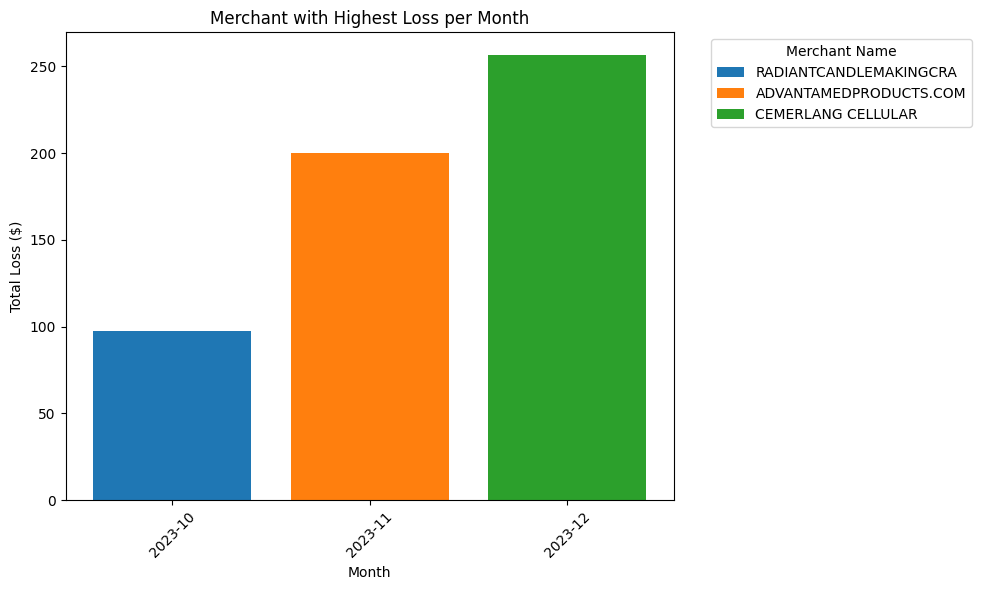

In [ ]:
# Monthly Loss Trends for the Top Merchant
unique_merchants = top_merchant_per_month['merchant_name']
color_palette = sns.color_palette("tab10", len(unique_merchants))  # Generate distinct colors
merchant_color_map = dict(zip(unique_merchants, color_palette))

# Assign colors based on the merchant name
bar_colors = top_merchant_per_month['merchant_name'].map(merchant_color_map)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(
    top_merchant_per_month['year_month'].astype(str),
    top_merchant_per_month['trans_amount'],
    color=bar_colors
)

# Add title, labels, and legend
plt.title("Merchant with Highest Loss per Month")
plt.xlabel("Month")
plt.ylabel("Total Loss ($)")
plt.xticks(rotation=45)

# Create legend
for merchant, color in merchant_color_map.items():
    plt.bar(0, 0, color=color, label=merchant)  # Dummy bars for legend
plt.legend(title="Merchant Name", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
# Identify the top 10 merchant with the highest losses per month

top_10_merchant_per_month = (loss_summary.groupby('year_month').head(10)).reset_index()
top_10_merchant_per_month

,index,year_month,merchant_id,merchant_name,trans_amount
0,8,2023-10,HSIR4947,RADIANTCANDLEMAKINGCRA,97.57
1,19,2023-10,WFTK8340,DOLLAR GENERAL #13406,83.58
2,11,2023-10,NMKX4453,PAG*Newcenteriii,80.20
3,12,2023-10,PHJF8465,AMZN Mktp US,59.88
4,17,2023-10,UPVO8174,APPLE.COM/BILL,55.76
5,13,2023-10,PIZM7331,GHUBWD.COM,39.99
6,15,2023-10,SUFN0582,THYCSF.COM,39.99
7,9,2023-10,JKVD3417,CULLIGAN CORNING,33.98
8,14,2023-10,QSYI1732,DAVES HOT CHICKEN 1164,31.77
9,1,2023-10,ASMS4148,GREENMOUNT LIQUORS,31.20


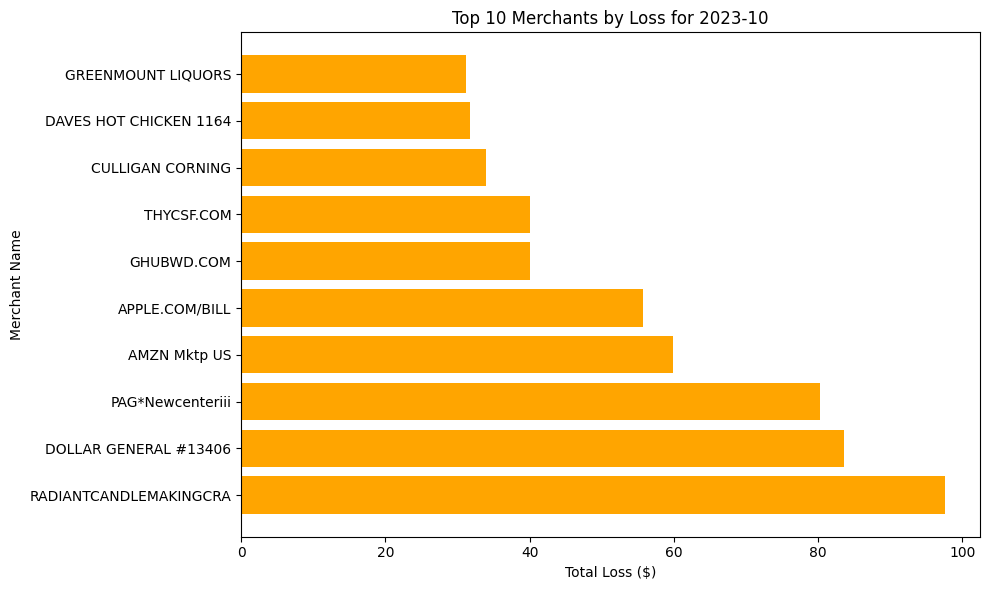

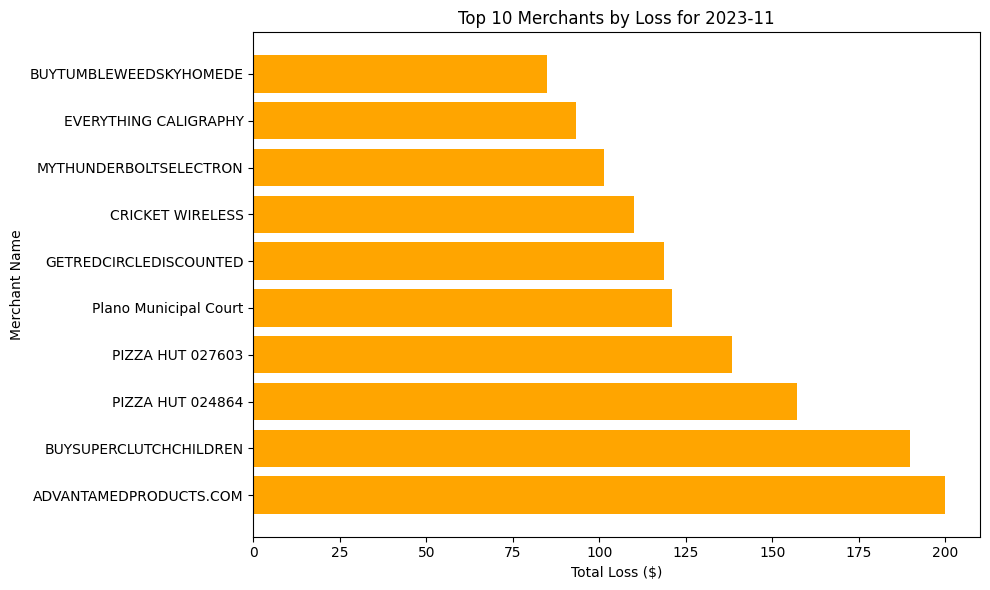

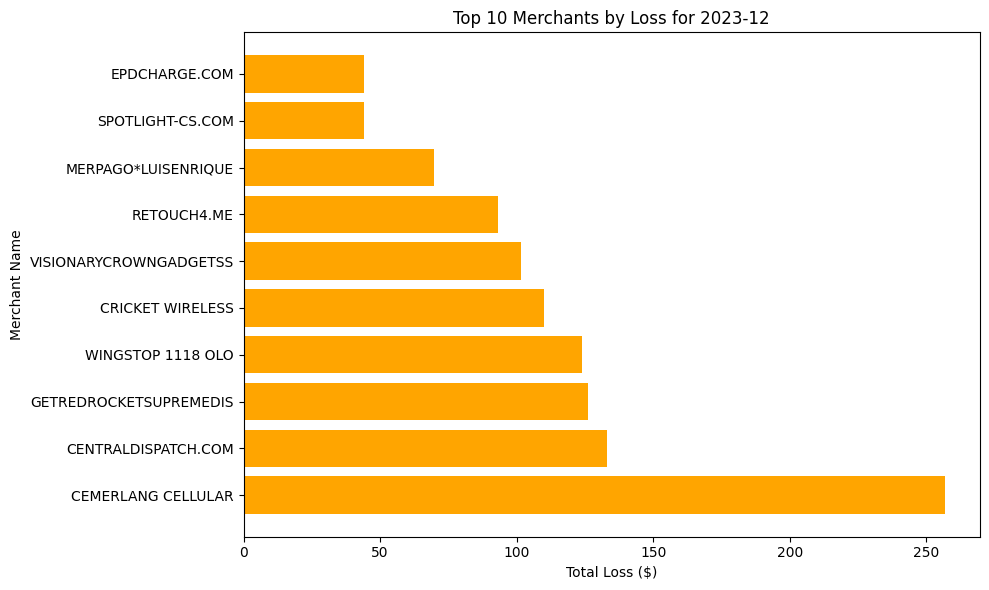

In [ ]:
# Top 10 Merchants by Loss for Each Month
for month, group in top_10_merchant_per_month.groupby('year_month'):
    plt.figure(figsize=(10, 6))
    plt.barh(group['merchant_name'], group['trans_amount'], color='orange')
    plt.title(f"Top 10 Merchants by Loss for {month}")
    plt.xlabel("Total Loss ($)")
    plt.ylabel("Merchant Name")
    plt.tight_layout()
    plt.show()

# **Q4. Jan 2024 Projection and before/after Strategy Performance**

Q4.	Can you help us understand how the trends will look for Jan 2024? Please showcase expectations before and after strategy implementation to understand the impact of the fraud strategy.

## **Forecasting trends for Jan 2024 using simple moving average technique**

In [ ]:
# Ensure trans_date is in datetime format
data['trans_date'] = pd.to_datetime(data['trans_date'], errors='coerce')

# Precompute fraud_amount column
data['fraud_amount'] = data.apply(
    lambda row: row['trans_amount'] if row['fraud_flag'] == 1 else 0, axis=1
)

# Aggregate daily metrics
daily_metrics = data.groupby('trans_date').agg(
    total_transactions=('trans_id', 'count'),
    total_sales=('trans_amount', 'sum'),
    fraud_transactions=('fraud_flag', 'sum'),
    fraud_amount=('fraud_amount', 'sum')
).reset_index()

# Calculate fraud rate
daily_metrics['fraud_rate'] = (daily_metrics['fraud_transactions'] / daily_metrics['total_transactions']) * 100

# Calculate rolling averages
daily_metrics['30_day_rolling_sales'] = daily_metrics['total_sales'].rolling(window=30).mean()
daily_metrics['30_day_rolling_fraud'] = daily_metrics['fraud_amount'].rolling(window=30).mean()
daily_metrics['30_day_rolling_fraud_rate'] = daily_metrics['fraud_rate'].rolling(window=30).mean()

# Add year_month column
daily_metrics['year_month'] = daily_metrics['trans_date'].dt.to_period('M')

# Display the metrics
daily_metrics

,trans_date,total_transactions,total_sales,fraud_transactions,fraud_amount,fraud_rate,30_day_rolling_sales,30_day_rolling_fraud,30_day_rolling_fraud_rate,year_month
0,2023-10-01,9,465.17,1,80.20,11.111111,NaN,NaN,NaN,2023-10
1,2023-10-02,7,323.55,1,97.57,14.285714,NaN,NaN,NaN,2023-10
2,2023-10-03,17,429.73,0,0.00,0.000000,NaN,NaN,NaN,2023-10
3,2023-10-04,14,746.79,0,0.00,0.000000,NaN,NaN,NaN,2023-10
4,2023-10-05,16,275.12,2,20.00,12.500000,NaN,NaN,NaN,2023-10
5,2023-10-06,12,290.15,0,0.00,0.000000,NaN,NaN,NaN,2023-10
6,2023-10-07,10,275.76,1,83.58,10.000000,NaN,NaN,NaN,2023-10
7,2023-10-08,3,82.32,0,0.00,0.000000,NaN,NaN,NaN,2023-10
8,2023-10-09,8,351.16,0,0.00,0.000000,NaN,NaN,NaN,2023-10
9,2023-10-10,8,303.05,0,0.00,0.000000,NaN,NaN,NaN,2023-10


In [ ]:
# calculate mean monthly metrics for comparison with Jan 2024 predictions

mean_monthly_metrics = daily_metrics.groupby('year_month').agg(
    total_transactions = ('total_transactions', 'mean'),
    total_sales = ('total_sales', 'mean'),
    fraud_transactions = ('fraud_transactions', 'mean'),
    fraud_amount = ('fraud_amount', 'mean'),
).reset_index()

mean_monthly_metrics['fraud_rate'] = (mean_monthly_metrics['fraud_transactions'] / mean_monthly_metrics['total_transactions']) * 100

In [ ]:
# prediction for January trends --> Using the last rolling average as the baseline for predictions

jan_2024_metrics = {
    'year_month': '2024-01',
    'total_sales': daily_metrics['30_day_rolling_sales'].iloc[-1],
    'fraud_amount': daily_metrics['30_day_rolling_fraud'].iloc[-1],
    'fraud_rate': daily_metrics['30_day_rolling_fraud_rate'].iloc[-1],
}
jan_2024_metrics_df = pd.DataFrame([jan_2024_metrics])

jan_2024_metrics_df['year_month'] = pd.to_datetime(jan_2024_metrics_df['year_month'])
jan_2024_metrics_df['year_month'] = jan_2024_metrics_df['year_month'].dt.to_period('M')

jan_2024_metrics_df

,year_month,total_sales,fraud_amount,fraud_rate
0,2024-01,453.439333,39.672667,5.284188


In [ ]:
# conactenate jan 2024 predictions with the average metrics for other months

trend = mean_monthly_metrics[['year_month',  'total_sales', 'fraud_amount', 'fraud_rate']]
trend = pd.concat([trend, jan_2024_metrics_df], ignore_index=True)
trend

,year_month,total_sales,fraud_amount,fraud_rate
0,2023-10,425.490968,23.530645,8.761329
1,2023-11,572.347667,60.767667,10.158730
2,2023-12,449.055161,38.392903,4.931507
3,2024-01,453.439333,39.672667,5.284188


In [ ]:
# calculate M-o-M change for the metrics

trend['sales_mom_change'] = round(trend['total_sales'].pct_change() * 100,2)
trend['fraud_mom_change'] = round(trend['fraud_amount'].pct_change() * 100,2)
trend['fraud_rate_mom_change'] = round(trend['fraud_rate'].pct_change() * 100,2)

## **Impact of Fraud Strategy**

**Following are the trends before applying fraud strategy**

In [ ]:
trend

,year_month,total_sales,fraud_amount,fraud_rate,sales_mom_change,fraud_mom_change,fraud_rate_mom_change
0,2023-10,425.490968,23.530645,8.761329,NaN,NaN,NaN
1,2023-11,572.347667,60.767667,10.158730,34.51,158.25,15.95
2,2023-12,449.055161,38.392903,4.931507,-21.54,-36.82,-51.46
3,2024-01,453.439333,39.672667,5.284188,0.98,3.33,7.15


**After applying Fraud Strategy**

In [ ]:
# Ensure 'trans_date' is in datetime format
data['trans_date'] = pd.to_datetime(data['trans_date'], errors='coerce')

# Create a column for fraud amount caught by rules
data['fraud_rule_amount'] = data.apply(
    lambda row: row['trans_amount'] if row['fraud_caught_by_rules_flag'] == 1 else 0, axis=1
)

# Aggregate daily metrics
daily_metrics = data.groupby('trans_date').agg(
    total_transactions=('trans_id', 'count'),
    total_sales=('trans_amount', 'sum'),
    fraud_transactions=('fraud_flag', 'sum'),
    fraud_rule_transactions=('fraud_caught_by_rules_flag', 'sum'),
    fraud_amount=('fraud_rule_amount', 'sum')
).reset_index()

# Adjust fraud count post-rules
daily_metrics['adjusted_fraud'] = daily_metrics['fraud_transactions'] - daily_metrics['fraud_rule_transactions']

# Calculate fraud rates
daily_metrics['fraud_rate'] = (daily_metrics['fraud_transactions'] / daily_metrics['total_transactions']) * 100
daily_metrics['adjusted_fraud_rate'] = (daily_metrics['adjusted_fraud'] / daily_metrics['total_transactions']) * 100

# Calculate rolling averages
daily_metrics['30_day_rolling_sales'] = daily_metrics['total_sales'].rolling(window=30).mean()
daily_metrics['30_day_rolling_fraud'] = daily_metrics['fraud_amount'].rolling(window=30).mean()
daily_metrics['30_day_rolling_fraud_rate'] = daily_metrics['fraud_rate'].rolling(window=30).mean()
daily_metrics['30_day_rolling_adjusted_fraud_rate'] = daily_metrics['adjusted_fraud_rate'].rolling(window=30).mean()

# Add year_month column
daily_metrics['year_month'] = daily_metrics['trans_date'].dt.to_period('M')

# Display the resulting DataFrame
daily_metrics


,trans_date,total_transactions,total_sales,fraud_transactions,fraud_rule_transactions,fraud_amount,adjusted_fraud,fraud_rate,adjusted_fraud_rate,30_day_rolling_sales,30_day_rolling_fraud,30_day_rolling_fraud_rate,30_day_rolling_adjusted_fraud_rate,year_month
0,2023-10-01,9,465.17,1,3,377.14,-2,11.111111,-22.222222,NaN,NaN,NaN,NaN,2023-10
1,2023-10-02,7,323.55,1,4,275.22,-3,14.285714,-42.857143,NaN,NaN,NaN,NaN,2023-10
2,2023-10-03,17,429.73,0,4,198.45,-4,0.000000,-23.529412,NaN,NaN,NaN,NaN,2023-10
3,2023-10-04,14,746.79,0,5,600.09,-5,0.000000,-35.714286,NaN,NaN,NaN,NaN,2023-10
4,2023-10-05,16,275.12,2,2,71.11,0,12.500000,0.000000,NaN,NaN,NaN,NaN,2023-10
5,2023-10-06,12,290.15,0,3,131.89,-3,0.000000,-25.000000,NaN,NaN,NaN,NaN,2023-10
6,2023-10-07,10,275.76,1,5,227.50,-4,10.000000,-40.000000,NaN,NaN,NaN,NaN,2023-10
7,2023-10-08,3,82.32,0,1,44.69,-1,0.000000,-33.333333,NaN,NaN,NaN,NaN,2023-10
8,2023-10-09,8,351.16,0,4,293.71,-4,0.000000,-50.000000,NaN,NaN,NaN,NaN,2023-10
9,2023-10-10,8,303.05,0,3,225.85,-3,0.000000,-37.500000,NaN,NaN,NaN,NaN,2023-10


In [ ]:
# calculate monthly metrics

monthly_metrics = daily_metrics.groupby('year_month').agg(
    total_transactions = ('total_transactions', 'mean'),
    total_sales = ('total_sales', 'mean'),
    fraud_transactions = ('fraud_transactions', 'mean'),
    fraud_rule_transactions = ('fraud_rule_transactions', 'mean'),
    adjusted_fraud = ('adjusted_fraud', 'mean'),
    fraud_amount = ('fraud_amount', 'mean'),
).reset_index()

monthly_metrics['fraud_rate'] = (monthly_metrics['fraud_transactions'] / monthly_metrics['total_transactions']) * 100
monthly_metrics['adjusted_fraud_rate'] = (monthly_metrics['adjusted_fraud'] / monthly_metrics['total_transactions']) * 100

In [ ]:
# prediction for January trends --> Using the last rolling average as the baseline for predictions

jan_2024_metrics = {
    'year_month': '2024-01',
    'total_sales': daily_metrics['30_day_rolling_sales'].iloc[-1],
    'fraud_amount': daily_metrics['30_day_rolling_fraud'].iloc[-1],
    'fraud_rate': daily_metrics['30_day_rolling_fraud_rate'].iloc[-1],
    'adjusted_fraud_rate': daily_metrics['30_day_rolling_adjusted_fraud_rate'].iloc[-1]
}
jan_2024_metrics_df = pd.DataFrame([jan_2024_metrics])

jan_2024_metrics_df['year_month'] = pd.to_datetime(jan_2024_metrics_df['year_month'])
jan_2024_metrics_df['year_month'] = jan_2024_metrics_df['year_month'].dt.to_period('M')

jan_2024_metrics_df

,year_month,total_sales,fraud_amount,fraud_rate,adjusted_fraud_rate
0,2024-01,453.439333,335.593667,5.284188,-29.189796


In [ ]:
# conactenate jan 2024 predictions with the average metrics for other months

trend = mean_monthly_metrics[['year_month',  'total_sales', 'fraud_amount', 'fraud_rate']]
trend = pd.concat([trend, jan_2024_metrics_df], ignore_index=True, sort=False)
trend

,year_month,total_sales,fraud_amount,fraud_rate,adjusted_fraud_rate
0,2023-10,425.490968,23.530645,8.761329,NaN
1,2023-11,572.347667,60.767667,10.158730,NaN
2,2023-12,449.055161,38.392903,4.931507,NaN
3,2024-01,453.439333,335.593667,5.284188,-29.189796


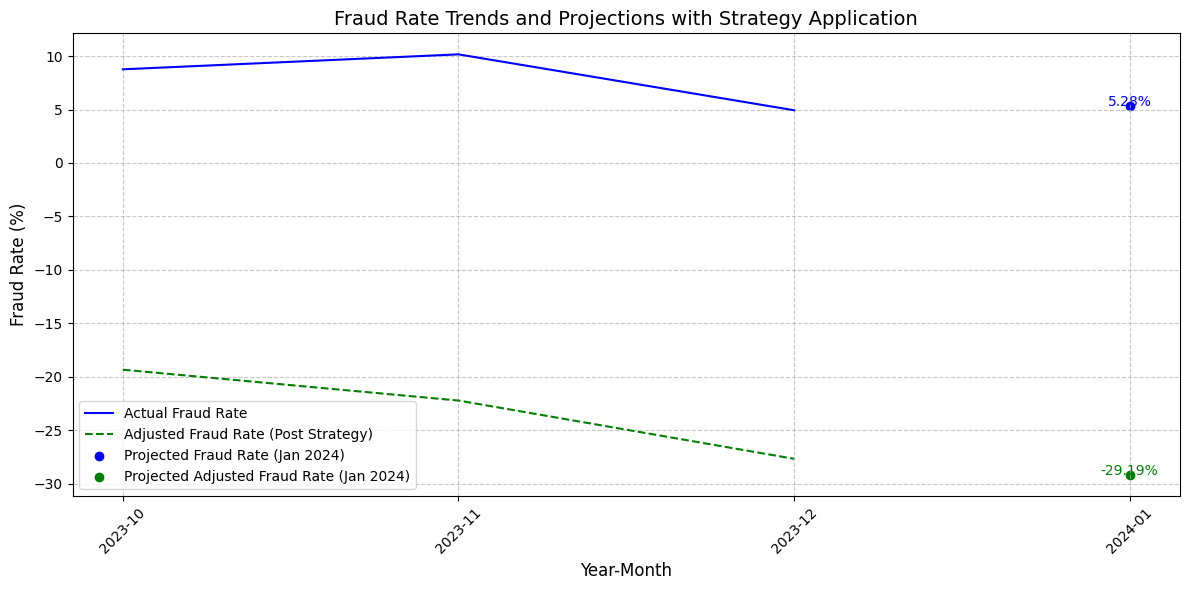

In [ ]:
# Convert Period to string for plotting
monthly_metrics['year_month'] = monthly_metrics['year_month'].astype(str)
jan_2024_metrics_df['year_month'] = jan_2024_metrics_df['year_month'].astype(str)

plt.figure(figsize=(12, 6))

# Line plot for historical fraud rate
plt.plot(
    monthly_metrics['year_month'],
    monthly_metrics['fraud_rate'],
    label='Actual Fraud Rate',
    color='blue'
)

# Line plot for historical adjusted fraud rate
plt.plot(
    monthly_metrics['year_month'],
    monthly_metrics['adjusted_fraud_rate'],
    label='Adjusted Fraud Rate (Post Strategy)',
    linestyle='--',
    color='green'
)

# Highlight January 2024 projections
plt.scatter(
    jan_2024_metrics_df['year_month'],
    jan_2024_metrics_df['fraud_rate'],
    color='blue',
    label='Projected Fraud Rate (Jan 2024)'
)
plt.scatter(
    jan_2024_metrics_df['year_month'],
    jan_2024_metrics_df['adjusted_fraud_rate'],
    color='green',
    label='Projected Adjusted Fraud Rate (Jan 2024)'
)

# Add titles and labels
plt.title('Fraud Rate Trends and Projections with Strategy Application', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Fraud Rate (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Add annotation for projections
for i, row in jan_2024_metrics_df.iterrows():
    plt.text(
        row['year_month'],
        row['fraud_rate'],
        f"{row['fraud_rate']:.2f}%",
        color='blue',
        fontsize=10,
        ha='center'
    )
    plt.text(
        row['year_month'],
        row['adjusted_fraud_rate'],
        f"{row['adjusted_fraud_rate']:.2f}%",
        color='green',
        fontsize=10,
        ha='center'
    )

plt.tight_layout()
plt.show()


**Historical Fraud Rate:**
The blue solid line shows relatively consistent fraud rates over the historical period (October-December 2023), around 9-10%.
This indicates that fraud rates did not vary significantly in recent months.

**Effect of the Strategy:**

The green dashed line trends downward over time, showing a decreasing fraud rate if the fraud prevention strategy were applied retroactively.
This highlights that the strategy could significantly reduce the fraud rate, with improvements accumulating over time.

**January 2024 Projections:**

**Without Strategy:**
The blue point shows the projected fraud rate for January 2024 is around 5.28%, indicating some reduction (possibly due to seasonal or natural trends).

**With Strategy:**
The green point shows the projected fraud rate drops further to around 0.29% if the strategy is applied.

# **Q5.	Fraud detection enhancement recommendations**

Q5. Provide recommendations on additional measures that could be implemented from a data perspective to enhance fraud detection.

**Advanced Rule-based fraud detection:**

The fraud detection approach used in this analysis is rule based.
Some more ideas for rule based fraud detection could be:
1. Flag accounts with unusually high spending within a short period compared to historical averages.
2. Flag newer accounts with higher spending
3. Flag unusual activity based on merchant category or merchant type (in-store/online)
With better context about the data, more sophisticated data-driven rules can also be created.

**Time Series analysis:**

Use techniques like ARIMA or Exponential smoothing models (e.g. Holt Winters) for forecasting trends

Using Arima

**Risk segmentation:**

Perform clustering to classify transactions into risk buckets (high, medium, low).

**Behavioral analysis using clustering:**

Perform customer and merchant behavior tracking and create profiles to identify any atypical behaviors.

**Anomaly detection models:**

Develop anomaly detection models to detect potential fraud using tree-based models like isolation forest, random forest,etc.

**Analyze the transactions marked as ACCT VERIFICATION**

Analyze transactions were sent for account verification to see what percentage of those were authorized and what percentage of those were declined. And then see how many of them were Fraud vs Non-Fraud.